In [1]:
import io
import pandas as pd
import numpy as np

from nltk import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.book import *
import math
from collections import Counter
import re, string
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
from imageio import imread
from nltk import sentiment

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
df = pd.read_csv("MovieSummaries/character.metadata.tsv", sep="\t", header=None)
df_movies = pd.read_csv("MovieSummaries/movie.metadata.tsv", sep="\t", encoding = 'utf8')

In [3]:
df = pd.DataFrame(
    np.row_stack([df.columns, df.values]),
    columns=['Wikipedia_movie_ID',
             'Freebase_movie_ID',
             'Movie_release_date',
             'Character_name',
             'Actor_DOB',
             'Actor_gender',
             'Actor_height',
             'Actor_ethnicity',
             'Actor_name',
             'Actor_age_at_movie_release',
             'Freebase_character_map',
             'Do_not_know_1',
             'Do_not_know_2'
            ]
)


#             'Movie_box_office_revenue',
 #            'Movie_runtime',
  #           'Movie_languages',
   #          'Movie_countries',
    #         'Movie_genres'

In [4]:
df_movies = pd.DataFrame(
    np.row_stack([df_movies.columns, df_movies.values]),
    columns=['Wikipedia_movie_ID',
             'Freebase_movie_ID',
             'Movie_name',
             'Movie_release_date',
             'Movie_box_office_revenue',
             'Movie_runtime',
             'Movie_languages',
             'Movie_countries',
             'Movie_genres'
            ]
)

In [5]:
#df_movies

In [6]:
moviePlots = io.open("MovieSummaries/plot_summaries.txt", encoding = 'utf8').read()

In [7]:
moviePlots= moviePlots.split(sep='\n')

In [8]:
len(moviePlots)

42307

In [9]:
movieDict = {}

for movie in moviePlots:
    words = movie.split(sep='\t')
    if(len(words) > 1):
        movieDict[words[0]] = words[1:]

In [10]:
len(movieDict)

42306

In [11]:
IMDbMovies = pd.read_csv("IMDb/clean_data.tsv", sep="\t", encoding = 'iso8859_2')#, dtype={"tconst": object, "titleType": object, "primaryTitle": object, "originalTitle": object, "isAdult": object, "startYear": object, "endYear": object, "runtimeMinutes": object, "genres": object})

In [12]:
#IMDbMovies

In [13]:
IMDbMoviesFilter = IMDbMovies['titleType']=="movie"
IMDbMovies = IMDbMovies[IMDbMoviesFilter]
len(IMDbMovies)

114415

In [13]:
recentYears = list(map(str, range(2012,2019)))

In [14]:
#f = open("IMDb/clean_data.tsv", "w")

In [15]:
#f.write("tconst	titleType \t primaryTitle \t originalTitle \t isAdult \t startYear \t endYear \t runtimeMinutes \t genres \n")

In [16]:
#for index, row in IMDbMovies.iterrows():
#    for cols in IMDbMovies.columns:
#        f.write(row[cols] + "\t")
#    f.write("\n")

In [17]:
#f.close()

In [11]:
import urllib.request
import json
import unidecode

In [12]:

wikiResponses = {}

In [20]:
# DONT RUN THIS


#plotSum = open("MovieSummaries/TMDBSummariesNONONO.txt", 'w')
#count = 0

#for movieDetails in IMDbMovies.get_values():
#    count +=1
#    if count % 500==0:
#        print(count)
#    #print(movieDetails)
#    
#    movieName = movieDetails[1]
#    
#    movieGenres = movieDetails[7]
#    
#    title =movieName
#    #print(title)#
#
#    dectitle = unidecode.unidecode(title)
#
#    #print(title)
#    title = dectitle.replace(" ", "+")
#
#   baseurl = "https://api.themoviedb.org/3/search/movie?api_key=03b7f051102a1a062a8b6ada9fdbd587&query="
#    #action = "action=&query="
#    title = f"{title}"
#    #content = "prop=revisions&rvprop=content&"
#    #dataformat = "format=json"
#
#    query = "%s%s" % (baseurl,title)
#    try:
#        response2 = urllib.request.urlopen(query)
#    except:
#        continue
#    data2 = response2.read()
#    details = json.loads(data2)
#    
#    if len(details['results']) > 0:
#        if 'overview' in details['results'][0].keys():
#            plotSum.write(dectitle +  "\t" + unidecode.unidecode(details['results'][0]['overview']) +"\t"+ movieGenres + "\n")
            #wikiResponses[movieName] = details['results'][0]['overview']


In [21]:
len(wikiResponses.keys())

0

In [22]:
title ="Queen"
#print(title)

title = unidecode.unidecode(title)

#print(title)
title = title.replace(" ", "_")

baseurl = "https://en.wikipedia.org/w/api.php?"
action = "action=query&"
title = f"titles={title}&"
content = "prop=revisions&rvprop=content&"
dataformat = "format=json"

query = "%s%s%s%s%s" % (baseurl,action,title,content,dataformat)

response2 = urllib.request.urlopen(query)
data2 = response2.read()
details = json.loads(data2)

wikiResponses += details["query"]    

TypeError: unsupported operand type(s) for +=: 'dict' and 'dict'

In [ ]:
#details["query"]["pages"]

In [ ]:
https://api.themoviedb.org/3/search/movie?api_key={api_key}&query=Jack+Reacher


In [ ]:
title ="Queen"
#print(title)

title = unidecode.unidecode(title)

#print(title)
title = title.replace(" ", "+")

baseurl = "https://api.themoviedb.org/3/search/movie?api_key=03b7f051102a1a062a8b6ada9fdbd587&query="
#action = "action=&query="
title = f"{title}"
#content = "prop=revisions&rvprop=content&"
#dataformat = "format=json"

query = "%s%s" % (baseurl,title)

response2 = urllib.request.urlopen(query)
data2 = response2.read()
details = json.loads(data2)

queenResponse = details    

In [ ]:
response2 = urllib.request.urlopen("https://api.themoviedb.org/3/search/movie?api_key=03b7f051102a1a062a8b6ada9fdbd587&query=Jack+Reacher")

In [ ]:
len(queenResponse['results'])#[0]['overview']

In [ ]:
'overview' in queenResponse['results'][0].keys()

## Word Clouds

One way of checking the similarity between movies, is with the use of word clouds. Word clouds shows the most common words within a given text. In this notebook, two different word clouds for old and new movie summaries given a specific genre can be compared. If many of same words occurs in the two word clouds, it may indicate that the given genre have not changed much over time.

First all the movie plots/summaries are loaded into variables so that *moviePlots* contains the old movie summaries, and *moviePlotsTMDB* contains the new movie summaries.

In [14]:
moviePlots = io.open("MovieSummaries/plot_summaries.txt", encoding = 'utf8').read()
moviePlots= moviePlots.split(sep='\n')

In [15]:
moviePlotsTMDB = io.open("MovieSummaries/TMDBSummaries.txt", encoding = 'utf8').read()
moviePlotsTMDB= moviePlotsTMDB.split(sep='\n')

In [16]:
l = df_movies['Movie_genres']

Each unique genre for the movies are stored in lists. 

In [17]:
uniqueGenres = []
genreDict = {}
count = 0
regex = "{?\"\/m\/\w*\": "
for element in l:
    g = element.split(", ")
    clean = []
    for genres in g:
        d = re.sub(regex,"",genres)
        d = re.sub("\"","",d)
        d = re.sub("{","",d)
        d = re.sub("}","",d)
        
        if(not d in uniqueGenres):
            uniqueGenres.append(d)
        
        clean.append(d)
    genreDict[str(df_movies['Wikipedia_movie_ID'][count])] = clean
    count += 1

In [18]:
newGenreDict = {}
new_unique_genres = []
for movies in moviePlotsTMDB:
    movie = movies.split(sep='\t')
    if len(movie)==3:
        genres = movie[2].split(sep=',')
        for g in genres:
            if not g in new_unique_genres:
                new_unique_genres.append(g)
            if g in newGenreDict.keys():
                newGenreDict[g].append(movie[1])
            else:
                newGenreDict[g] = [movie[1]]

In [19]:
shared_genres = []

for genre in new_unique_genres:
    if genre=="Adult":
        continue
    if genre in uniqueGenres:
        shared_genres.append(genre)

In order to access the genre summaries independently, the summaries are stored in seperate files with the corresponding genre.

In [20]:
#Commented out since it should only be run once

#Read the files and put all tweets into one large file
#for mID, genres in genreDict.items():
#    for g in genres:
#        try:
#            if(str(mID) in movieDict):
#                filename = "OldGenreSummaries/"+g+".txt" 
#                f = open(filename,"a", encoding='utf-8')
#                f.write(str(movieDict[mID]) + " ")
#                #print(g)
#                #print(movieDict[mID])
#                f.close()

#        except Exception:
#             continue

In [21]:
#Commented out since it should only be run once

#for genre, summary in newGenreDict.items():
#    try:
#       filename = "NewGenreSummaries/"+genre+".txt"
#        f = open(filename, "a", encoding ='utf-8')
#        for s in summary:
#            f.write(s + " ")
#        f.close()
        
#    except Exception:
#        continue
    

The summaries of each genre is read from the files and are used as the input for the *TF-IDF*.

In [22]:
old_docs=[]
old_genreNumbers = {}
count = 0
for g in shared_genres:
        try: 
            filename = "OldGenreSummaries/"+g+".txt" 
            f = io.open(filename, encoding = 'utf8').read()
            old_docs.append(f)
            old_genreNumbers[g]=count
            count +=1
        except Exception:
             continue

The build in TF-IDF calculator from sklearn is used to find the TF-IDF of each word for the given genres. This is later used when the word clouds are generated.

TF-IDF is short for *term frequency–inverse document frequency* and is used to reflect the importance of different words in a given document in a collection of documents. The TF-IDF value for a given word increases proportionally to the amount of times the word occurs in the document. This is given by the TF part of TF-IDF. TF is short for *term frequency* and is calculated as:

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)

The second term IDF is short for *inverse document frequency* whcich is necessary to account for the fact that some words, such as "the", "of", and "a", generally appear more frequently than other words. IDF is calculated as:

IDF(t) = log(Total number of documents / Number of documents that contains term t)

Finally TF-IDF is calculated as:

TF-IDF(T) = TF(t) * IDF(t) [1]


In [23]:
# settings that you use for count vectorizer will go here
old_tfidf_vectorizer=TfidfVectorizer(use_idf=True, stop_words = set(stopwords.words('english')))
 
# just send in all your docs here
old_tfidf_vectorizer_vectors=old_tfidf_vectorizer.fit_transform(old_docs)

To see the word cloud for another genre, simply change genre from "Action" to "some genre" in the code below, where *some genre* can be almost any given genre. The genre is initially set to "Action" which will be used as the running example for the remainder of the word cloud section.

In [24]:
genre = "Action"
#genre = "Adventure"
#genre = "Animation"
#genre = "Biography"
#genre = "Comedy"
#genre = "Crime"
#genre = "Documentary"
#genre = "Drama"
#genre = "Fantasy"
#genre = "History"
#genre = "Horror"
#genre = "Music"
#genre = "Musical"
#genre = "Mystery"
#genre = "News"
#genre = "Thriller"
#genre = "Western"

In [25]:
old_vector_tfidfvectorizer=old_tfidf_vectorizer_vectors[old_genreNumbers[genre]] 
# place tf-idf values in a pandas data frame
old_action_idf = pd.DataFrame(old_vector_tfidfvectorizer.T.todense()*100, index=old_tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
#action_idf.sort_values(by=["tfidf"],ascending=False)

The code below makes a string which contains the individual words multiple times based on the TF-IDF value of that word. So if a word has a high TF-IDF value it occurs more often in the string than a word with a lower TF-IDF value.

In [26]:
old_action_tf_idf_string = ""
count = 0
for w in old_action_idf.index:
    for i in range(1,int(old_action_idf.values[count])):
        old_action_tf_idf_string += w + " "
    count += 1

 The word cloud below shows the word cloud for old movies of the given genre.

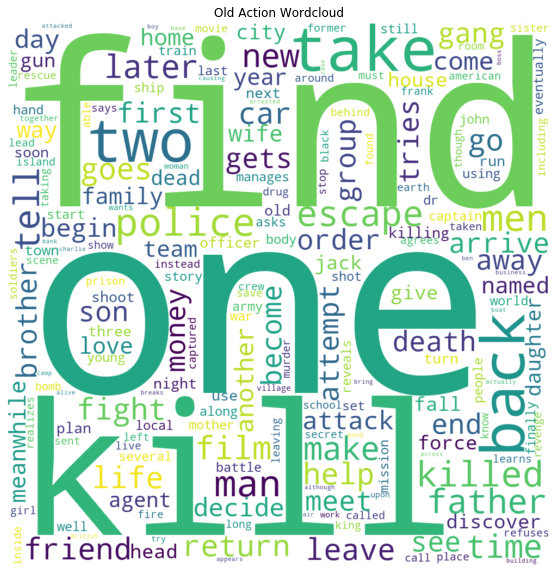

In [27]:
old_action_wc = WordCloud(background_color="white", width=1000, height=1000, collocations=False).generate(old_action_tf_idf_string)
plt.figure(3,figsize=(10,10))
plt.title("Old " + genre + " Wordcloud")
plt.imshow(old_action_wc, interpolation="bilinear")
plt.margins(x=0, y=0)
plt.axis("off")
plt.show()

Now the same process is done for new movies to make the word cloud.

In [28]:
new_docs=[]
new_genreNumbers = {}
count = 0
for g in shared_genres:
        try: 
            filename = "NewGenreSummaries/"+g+".txt" 
            f = io.open(filename, encoding = 'utf8').read()
            new_docs.append(f)
            new_genreNumbers[g]=count
            count +=1
        except Exception:
             continue

In [29]:
# settings that you use for count vectorizer will go here
new_tfidf_vectorizer=TfidfVectorizer(use_idf=True, stop_words = set(stopwords.words('english')))
 
# just send in all your docs here
new_tfidf_vectorizer_vectors=new_tfidf_vectorizer.fit_transform(new_docs)

In [30]:
new_vector_tfidfvectorizer=new_tfidf_vectorizer_vectors[new_genreNumbers[genre]] 
# place tf-idf values in a pandas data frame
new_action_idf = pd.DataFrame(new_vector_tfidfvectorizer.T.todense()*100, index=new_tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
#action_idf.sort_values(by=["tfidf"],ascending=False)

In [31]:
new_action_tf_idf_string = ""
count = 0
for w in new_action_idf.index:
    for i in range(1,int(new_action_idf.values[count])):
        new_action_tf_idf_string += w + " "
    count += 1

The word cloud for new action movies can be seen below.

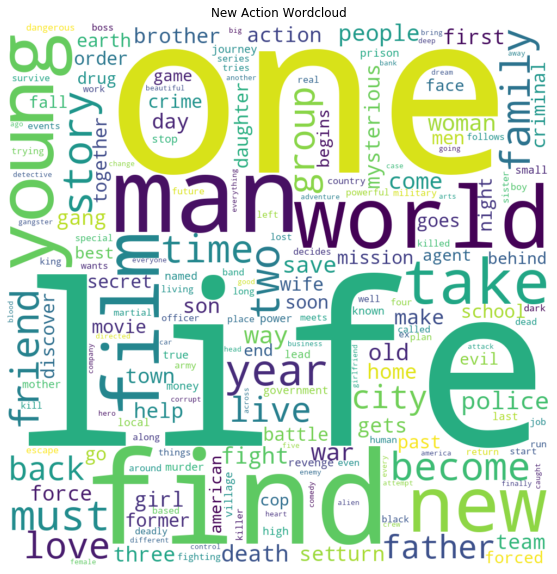

In [32]:
new_action_wc = WordCloud(background_color="white", width=1000, height=1000, collocations=False).generate(new_action_tf_idf_string)
plt.figure(3,figsize=(10,10))
plt.title("New " + genre + " Wordcloud")
plt.imshow(new_action_wc, interpolation="bilinear")
plt.margins(x=0, y=0)
plt.axis("off")
plt.show()

When the old action movie word cloud and the new action word cloud is compared, one may notice that the most dominant words are present in both word clouds. These words include "one", "man", "find", "police", and so on. The fact that these word clouds share many of the same words gives some evidence that the action movies may not have changeed much over time, although more evidence is needed to make that conclusion.

## Sentiment

Another way of analyzing wether movies have changed over time is with the use of sentiment scores. The LabMIT 1.0 wordlist has been used to find the average sentiment score for the old and new movies. 

The LabMT 1.0 wordlist contains 10,222 unique words. These words are found by compiling word lists from four different sources: Twitter, Google Books (English), music lyrics (1960 to 2007), and the New York Times (1987 to 2007). The word lists from each of these sources are ordered by decreasing frequency of occurence. The top 5,000 words from each source are merged yielding a list of 10,222 unique words. The happiness rating of the individual words are found using Amazon's Mechanical Turk, which evaluates each word by having 50 independent users rate it on a scale of 1 to 9 based on how happy it made them feel. 1 being sad and 9 being happy. The happiness rating of a word is then the average of these 50 ratings. [2]

In [33]:
sentimentals = open("Data_Set_S1.txt","r", encoding='utf8').read()

In [34]:
sentimentals_lines = sentimentals.split('\n')

In [35]:
avg_happiness_map = {}

for l in sentimentals_lines:
    h = l.split(sep='\t')
    if len(h)>1:
        try:
            avg_happiness_map[h[0]] = float(h[2])
        except Exception:
            continue

The *getAvgHappiness* function calculates the averages happiness of a list of tokens, and is later used to calculate the average happiness of the old and new movie genres.

In [42]:
def getAvgHappiness(tokens) :
    total = 0
    for token in tokens :
        try :
            total += avg_happiness_map[token]
            #print("Hej")
        except :
            total += 0
    return total / len(tokens)

The below code generates the tokens for each genre so that they could be used with the *getAvgHappiness* function. These tokens have been written into a text file for quicker access, and has thus been commented out.

The build in tokenizer from nltk has been used to tokenize the summaries from each genre. Tokenization is to separate a string into meaningfull sections. As an example the string "The slow white dog run across the field" of 39 characters could be split into 8 different tokens. The reason for this is that the string is not implicitly segmented on spaces. [3] 

In [ ]:
#Takes forever. Not necesarry since tokens have been stored in file

old_tokens = []

for g in shared_genres:
    try :
        file = open("OldGenreSummaries/"+ g + ".txt", "r", encoding="utf8").read()
        l = file.split('\n')
        for t in l: 
            tokens = [w.lower() for w in nltk.word_tokenize(t) if not w in string.punctuation and not w in set(stopwords.words("english")) and not w.isdigit() and not w.startswith("//")]
            old_tokens.append(tokens)
    except Exception:
        dummy=1

In [ ]:
#Not necesarry since tokens have been stored in file

new_tokens = []

for g in shared_genres:
    try :
        file = open("NewGenreSummaries/"+ g + ".txt", "r", encoding="utf8").read()
        l = file.split('\n')
        for t in l: 
            tokens = [w.lower() for w in nltk.word_tokenize(t) if not w in string.punctuation and not w in set(stopwords.words("english")) and not w.isdigit() and not w.startswith("//")]
            new_tokens.append(tokens)
    except Exception:
        dummy=1

In [39]:
#Should only be run once

#for tokens in old_tokens:
#    filename = "oldTokens.txt"
#    f = open(filename, "a", encoding ='utf-8')
#    for t in tokens:
#        f.write(t + " ")
#    f.close()

#for tokens in new_tokens:
#    filename = "newTokens.txt"
#    f = open(filename, "a", encoding ='utf-8')
#    for t in tokens:
#        f.write(t + " ")
#    f.close()

In [43]:
old_tokens = open("oldTokens.txt", 'r', encoding = 'utf8').read()
old_tokens = old_tokens.split(" ")

new_tokens = open("newTokens.txt", 'r', encoding = 'utf8').read()
new_tokens = new_tokens.split(" ")

The previously explained function is used to find the average happiness of each genre for both the old and new movies.

In [44]:
happinessOld = [getAvgHappiness(tokens) for tokens in old_tokens if getAvgHappiness(tokens) > 0]
happinessNew = [getAvgHappiness(tokens) for tokens in new_tokens if getAvgHappiness(tokens) > 0]

'eva
'eva
upper
upper
class
class
housewife
housewife
becomes
becomes
frustrated
frustrated
leaves
leaves
arrogant
arrogant
husband
husband
she
she
drawn
drawn
idea
idea
becoming
becoming
call
call
girl
girl
with
with
aid
aid
prostitute
prostitute
named
named
yvonne
yvonne
eva
eva
learns
learns
basics
basics
set
set
looking
looking
johns
johns
together
together
she
she
meets
meets
charming
charming
man
man
falls
falls
love
love
comes
comes
house
house
late
late
night
night
romantic
romantic
tryst
tryst
he
he
turns
turns
gigolo
gigolo
consequently
consequently
move
move
penthouse
penthouse
large
large
enough
enough
offer
offer
services
services
separately
separately
then
then
slowly
slowly
eva
eva
enters
enters
world
world
sado-masochism
sado-masochism
she
she
finds
finds
dominatrix
dominatrix
extremely
extremely
satisfying
satisfying
begins
begins
take
take
pleasure
pleasure
controlling
controlling
others
others
causing
causing
intense
intense
pain
pain
she
she
discovers
discovers
scen

way
way
pass
pass
bank
bank
children
children
see
see
``
the
the
bird
bird
woman
woman
''
mary
mary
sang
sang
night
night
want
want
feed
feed
birds
birds
around
around
george
george
none
none
expresses
expresses
lack
lack
interest
interest
mary
mary
poppins
poppins
says
says
orders
orders
children
children
``
come
come
along
along
''
mention
mention
name
name
rest
rest
day
day
upon
upon
arriving
arriving
bank
bank
mr.
mr.
dawes
dawes
jr
jr
mr.
mr.
dawes
dawes
sr
sr
—mr
—mr
banks\
banks\
employers—aggressively
employers—aggressively
try
try
persuade
persuade
michael
michael
invest
invest
tuppence
tuppence
bank
bank
point
point
actually
actually
snatching
snatching
hand
hand
without
without
waiting
waiting
permission
permission
when
when
michael
michael
protests
protests
customers
customers
misunderstand
misunderstand
start
start
run
run
bank
bank
forces
forces
bank
bank
suspend
suspend
business
business
the
the
bank
bank
guard
guard
chases
chases
children
children
causing
causing
childr

world
world
married
married
life
life
robert
robert
her
her
problem
problem
share
share
feelings
feelings
mental
mental
agony
agony
’
uncle
uncle
’
incoming
incoming
outgoing
outgoing
letters
letters
mary
mary
screened
screened
first
first
head
head
orphanage
orphanage
finally
finally
robert
robert
breaks
breaks
heart
heart
decides
decides
become
become
nun
nun
writes
writes
final
final
letter
letter
'her
'her
uncle
uncle
’
special
special
last
last
request
request
head
head
orphanage
orphanage
deliver
deliver
’
uncle
uncle
’
without
without
opening
opening
reading
reading
content
content
dr.
dr.
pramila
pramila
knowing
knowing
developments
developments
tries
tries
stop
stop
mary
mary
remains
remains
firm
firm
decision
decision
now
now
lover
lover
also
also
gets
gets
desperate
desperate
upon
upon
knowing
knowing
decision
decision
finally
finally
onus
onus
falls
falls
shoulders
shoulders
robert
robert
something
something
prevent
prevent
mary
mary
taking
taking
drastic
drastic
step
step


new
new
york
york
city
city
holidays
holidays
``
the
the
film
film
tells
tells
story
story
six
six
mental
mental
cases
cases
trying
trying
get
get
rid
rid
society
society
's
's
norms
norms
values
values
kidnapping
kidnapping
gerard
gerard
van
van
dongen
dongen
well-known
well-known
tv
tv
host
host
during
during
improvised
improvised
tv
tv
show
show
terrorists
terrorists
confront
confront
van
van
dongen
dongen
darkest
darkest
thoughts
thoughts
emotions
emotions
resulting
resulting
violent
violent
excesses
excesses
extreme
extreme
sexual
sexual
behaviour
behaviour
''
'the
'the
film
film
portrays
portrays
aggressive
aggressive
belligerent
belligerent
police
police
officer
officer
named
named
nariman
nariman
investigates
investigates
murder
murder
case
case
innocent
innocent
man
man
falsely
falsely
accused
accused
``
the
the
film
film
opens
opens
funeral
funeral
world
world
war
war
ii
ii
veteran
veteran
the
the
man
man
's
's
daughter
daughter
marie
marie
delivers
delivers
eulogy
eulogy
chu

d'souza
gets
gets
enrolled
enrolled
serpent
serpent
gang
gang
lakshman
lakshman
know
know
kumar
kumar
leader
leader
gang
gang
none
none
brother
brother
ram
ram
when
when
laxman
laxman
finds
finds
must
must
make
make
choice
choice
mdash
mdash
whether
whether
let
let
innocent
innocent
prakash
prakash
go
go
gallows
gallows
turn
turn
brother
brother
hanged
hanged
death
death
''
'arthur
'arthur
kirkland
kirkland
hotheaded
hotheaded
idealistic
idealistic
young
young
defense
defense
attorney
attorney
baltimore
baltimore
as
as
film
film
opens
opens
jail
jail
charge
charge
contempt
contempt
court
court
thrown
thrown
punch
punch
judge
judge
henry
henry
t.
t.
fleming
fleming
arguing
arguing
case
case
innocent
innocent
defendant
defendant
jeff
jeff
mccullaugh
mccullaugh
mccullaugh
mccullaugh
stopped
stopped
minor
minor
traffic
traffic
offense
offense
mistaken
mistaken
killer
killer
name
name
convicted
convicted
he
he
already
already
endured
endured
year
year
half
half
jail
jail
kirkland
kirkland
c

mentor
mentor
help
help
plan
plan
menu
menu
dream
dream
restaurant
restaurant
brilliant
brilliant
young
young
french-korean
french-korean
chef
chef
arrive
arrive
evening
evening
park
park
du-re
du-re
french-korean
french-korean
mentor
mentor
turns
turns
mo-rae
mo-rae
's
's
stranger
stranger
staying
staying
young
young
couple
couple
sleeping
sleeping
room
room
belonged
belonged
sang-in
sang-in
's
's
late
late
mother
mother
with
with
husband
husband
blissfully
blissfully
unaware
unaware
du-re
du-re
’
identity
identity
encourages
encourages
mo-rae
mo-rae
get
get
along
along
mo-rae
mo-rae
powerfully
powerfully
drawn
drawn
seductive
seductive
du-re
du-re
sang-in
sang-in
gets
gets
cooking
cooking
lessons
lessons
leading
leading
poor
poor
woman
woman
somewhat
somewhat
crisis
crisis
tries
tries
decide
decide
heart
heart
really
really
wants
wants
cite
cite
web
web
cite
cite
web
web
cite
cite
web
web
''
'the
'the
film
film
opens
opens
lawrence
lawrence
screening
screening
room
room
watching
watc

save
father
father
hands
hands
gaja
gaja
anantharaj
anantharaj
he
he
kills
kills
makes
makes
villagers
villagers
believe
believe
mohanbabu
mohanbabu
done
done
pedarayudu
pedarayudu
sentences
sentences
years
years
exile
exile
brother
brother
's
's
family
family
now
now
gaja
gaja
anantharaj
anantharaj
comes
comes
know
know
daughter
daughter
's
's
love
love
tries
tries
kill
kill
raja
raja
ravindra
ravindra
help
help
goons
goons
mohanbabu
mohanbabu
goes
goes
rescue
rescue
pregnant
pregnant
soundarya
soundarya
goes
goes
pedarayudu
pedarayudu
convey
convey
message
message
jayanthi
jayanthi
rushes
rushes
pedarayudu
pedarayudu
reveals
reveals
truth
truth
tells
tells
punished
punished
brother
brother
without
without
committing
committing
mistake
mistake
mohanbabu
mohanbabu
takes
takes
revenge
revenge
gaja
gaja
anantharaj
anantharaj
pedarayudu
pedarayudu
dies
dies
knowing
knowing
gave
gave
wrong
wrong
verdict
verdict
now
now
mohanbabu
mohanbabu
shown
shown
taking
taking
ancestral
ancestral
thron

truckers
truckers
evade
evade
confront
confront
police
police
rubber
rubber
duck
duck
becomes
becomes
reluctant
reluctant
folk
folk
hero
hero
it
it
becomes
becomes
apparent
apparent
truckers
truckers
great
great
deal
deal
political
political
support
support
governor
governor
new
new
mexico
mexico
jerry
jerry
haskins
haskins
meets
meets
rubber
rubber
duck
duck
at
at
time
time
wallace
wallace
brutal
brutal
alvarez
alvarez
texas
texas
sheriff
sheriff
arrest
arrest
spider
spider
mike
mike
left
left
convoy
convoy
wife
wife
giving
giving
birth
birth
son
son
wallace\
wallace\
's
's
plan
plan
trap
trap
rubber
rubber
duck
duck
a
a
janitor
janitor
jail
jail
unaware
unaware
plan
plan
messages
messages
cb
cb
radio
radio
spider
spider
mike
mike
arrested
arrested
beaten
beaten
various
various
truckers
truckers
relay
relay
message
message
new
new
mexico
mexico
rubber
rubber
duck
duck
ends
ends
meeting
meeting
haskins
haskins
leaves
leaves
rescue
rescue
spider
spider
mike
mike
several
several
truckers

police
police
captain
captain
named
named
bosch
bosch
introduced
introduced
bosch
bosch
personal
personal
interest
interest
recent
recent
flood
flood
missing
missing
persons
persons
reported
reported
precinct
precinct
bosch
bosch
interviews
interviews
a.j
a.j
``
the
the
reverend
reverend
''
shepherd
shepherd
daniel
daniel
stern
stern
runs
runs
local
local
homeless
homeless
shelter
shelter
shepherd
shepherd
believes
believes
recent
recent
events
events
part
part
massive
massive
government
government
cover-up
cover-up
evidence
evidence
prove
prove
bosch\
bosch\
's
's
superiors
superiors
know
know
letting
letting
seem
seem
taking
taking
cues
cues
overly
overly
glib
glib
weasely
weasely
type
type
named
named
wilson
wilson
works
works
nuclear
nuclear
regulatory
regulatory
commission
commission
it
it
turns
turns
monsters
monsters
lurking
lurking
beneath
beneath
streets
streets
beings
beings
human
human
radioactive
radioactive
chemical
chemical
toxic
toxic
waste
waste
mutated
mutated
hideous


remarking
remarking
paul\
paul\
's
's
employer
employer
dudley
dudley
digges
digges
``
valiant
valiant
word
word
carrie
carrie
''
``
charles
charles
farmer
farmer
former
former
astronaut-in-training
astronaut-in-training
discharged
discharged
military
military
could
could
fulfill
fulfill
dream
dream
becoming
becoming
vital
vital
part
part
nasa
nasa
having
having
missed
missed
opportunity
opportunity
travel
travel
space
space
decides
decides
build
build
replica
replica
historic
historic
mercury-atlas
mercury-atlas
barn
barn
secluded
secluded
ranch
ranch
fictional
fictional
town
town
story
story
texas
texas
using
using
assets
assets
facing
facing
foreclosure
foreclosure
result
result
when
when
begins
begins
making
making
inquiries
inquiries
purchasing
purchasing
rocket
rocket
fuel
fuel
fbi
fbi
faa
faa
step
step
investigate
investigate
ensuing
ensuing
publicity
publicity
thrusts
thrusts
farmer
farmer
spotlight
spotlight
makes
makes
media
media
darling
darling
farmer
farmer
's
's
first
fir

okay
i
i
don\'t
don\'t
either
either
''
``
oru
oru
black
black
white
white
kudumbam
kudumbam
movie
movie
handsome
handsome
guy
guy
adithya
adithya
varma
varma
son
son
dark-skinned
dark-skinned
father
father
antony
antony
fair
fair
mother
mother
lakshmi
lakshmi
antony
antony
lorry
lorry
driver
driver
man
man
complex
complex
colour
colour
since
since
wife
wife
belongs
belongs
kovilakam
kovilakam
family
family
fair
fair
beautiful
beautiful
this
this
family
family
known
known
'oru
'oru
black
black
white
white
kudumbam
kudumbam
neighborhood
neighborhood
basic
basic
plot
plot
revolves
revolves
around
around
backdrop
backdrop
tensions
tensions
antony
antony
creates
creates
house
house
name
name
colour
colour
''
expand
expand
section
section
a
a
reformed
reformed
jewel
jewel
thief
thief
tries
tries
clear
clear
society
society
beauty
beauty
murder
murder
charges.http
charges.http
'the
'the
story
story
ostracized
ostracized
teenager
teenager
cliff
cliff
evans
evans
following
following
parents\
p

s.p
s.p
jagdishan
jagdishan
attempt
attempt
bring
bring
law
law
order
order
troubled
troubled
city
city
even
even
permits
permits
aadesh
aadesh
meet
meet
asha
asha
when
when
bhika
bhika
kills
kills
owner
owner
local
local
newspaper
newspaper
'bharat
'bharat
nagar
nagar
times
times
jagdishan
jagdishan
arrests
arrests
d
d
souza
souza
's
's
daughter
daughter
mary
mary
comes
comes
forward
forward
testify
testify
get
get
instructions
instructions
transfer
transfer
distant
distant
malegaon
malegaon
immediate
immediate
release
release
bhika
bhika
together
together
gulabchand
gulabchand
set
set
rule
rule
bharat
bharat
nagar
nagar
one
one
bold
bold
enough
enough
stand
stand
way
way
''
'the
'the
catastrophe
catastrophe
surreal
surreal
drama/mystery
drama/mystery
short
short
film
film
uses
uses
dreamlike
dreamlike
imagery
imagery
bob
bob
dylan
dylan
song
song
poem
poem
forough
forough
farrokhzad
farrokhzad
paint
paint
portrait
portrait
dominicus
dominicus
pike
pike
quintessential
quintessential
m

another
prisoner
prisoner
also
also
arrested
arrested
large
large
quantity
quantity
hashish
hashish
billy
billy
’
father
father
arrives
arrives
us
us
two
two
share
share
emotional
emotional
reunion
reunion
the
the
courtroom
courtroom
scene
scene
billy
billy
’
trial
trial
disorienting
disorienting
father
father
son
son
prosecutor
prosecutor
rapidly
rapidly
hurls
hurls
accusations
accusations
billy
billy
turkish
turkish
as
as
two
two
ask
ask
lawyer
lawyer
explanation
explanation
yesil
yesil
reassures
reassures
remarks
remarks
technical
technical
worry
worry
judge
judge
likes
likes
the
the
judge
judge
returns
returns
verdict
verdict
years
years
prison
prison
angering
angering
prosecutor
prosecutor
devastating
devastating
billy
billy
father
father
yesil
yesil
assures
assures
excellent
excellent
outcome
outcome
billy
billy
could
could
received
received
lifetime
lifetime
sentence
sentence
smuggling
smuggling
sentence
sentence
prosecutor
prosecutor
vehemently
vehemently
arguing
arguing
father

singing
jeanne
jeanne
sung
sung
“
fly
fly
away
away
home…
home…
”
in
in
days
days
come
come
mandy
mandy
jeanne
jeanne
become
become
increasingly
increasingly
unable
unable
cope
cope
while
while
walking
walking
dog
dog
mandy
mandy
breaks
breaks
away
away
unexpected
unexpected
speed
speed
runs
runs
jeanne
jeanne
find
find
for
for
hours
hours
mandy
mandy
lost
lost
jeanne
jeanne
desperate
desperate
until
until
tom
tom
arrives
arrives
returning
returning
he
he
found
found
mandy
mandy
hiding
hiding
dog
dog
park
park
jeanne
jeanne
’
gratitude
gratitude
hints
hints
renewed
renewed
possibility
possibility
at
at
last
last
jeanne
jeanne
realizes
realizes
residential
residential
facility
facility
mandy
mandy
’
last
last
best
best
chance
chance
she
she
suggests
suggests
peter
peter
they
they
meet
meet
professional
professional
advisor
advisor
discuss
discuss
difficult
difficult
choice
choice
although
although
suggested
suggested
jeanne
jeanne
anguished
anguished
thought
thought
losing
losing
child


sacrifice
sacrifice
christian
christian
martyr
martyr
fueguiña
fueguiña
one
one
orphans
orphans
institution
institution
paulina
paulina
works
works
plays
plays
leading
leading
role
role
java
java
wants
wants
actor
actor
blackmails
blackmails
fueguiña
fueguiña
order
order
take
take
part
part
devil
devil
play
play
reluctantly
reluctantly
conrado
conrado
allows
allows
participate
participate
least
least
rehearsals
rehearsals
flash
flash
back
back
during
during
war
war
marcos
marcos
fighting
fighting
republic
republic
takes
takes
revenge
revenge
don
don
conrado
conrado
’
brutality
brutality
towards
towards
girlfriend
girlfriend
aurora
aurora
nin
nin
when
when
men
men
marco
marco
’
command
command
find
find
conrado
conrado
kill
kill
conrado
conrado
’
father
father
instead
instead
conrado
conrado
’
mother
mother
barely
barely
escapes
escapes
life
life
thanks
thanks
aurora
aurora
’
intervention
intervention
in
in
one
one
sexual
sexual
assignments
assignments
conrado
conrado
java
java
young
yo

republic
republic
china
china
latter
latter
blockaded
blockaded
later
later
invaded
invaded
taiwan.
taiwan.
ref
ref
namehttp
namehttp
|titlehmsrichmond.org
|titlehmsrichmond.org
|date2012-09-18
|date2012-09-18
the
the
novel
novel
took
took
title
title
fragment
fragment
t.
t.
s.
s.
eliot\
eliot\
's
's
poem
poem
the
the
hollow
hollow
men.shute
men.shute
nevil
nevil
``
on
on
the
the
beach
beach
''
william
william
morrow
morrow
company
company
ny
ny
ny
ny
``
vera
vera
femme
femme
fatale
fatale
21st
21st
century
century
beautiful
beautiful
capricious
capricious
young
young
woman
woman
living
living
new
new
york
york
begins
begins
exploring
exploring
limits
limits
sexual
sexual
intellectual
intellectual
power
power
she
she
picks
picks
men
men
street
street
sex
sex
apartment
apartment
she
she
also
also
videotapes
videotapes
sexual
sexual
romp
romp
female
female
lover
lover
sexually
sexually
frank
frank
discussions
discussions
potential
potential
employer
employer
as
as
daughter
daughter
wealt

placed
care
care
three
three
greedy
greedy
uncles
uncles
really
really
interested
interested
gaining
gaining
siddhant
siddhant
's
's
fortune
fortune
their
their
uncles
uncles
start
start
treating
treating
kids
kids
extremely
extremely
badly
badly
just
just
adoption
adoption
papers
papers
signed
signed
young
young
man
man
comes
comes
rai
rai
household
household
claiming
claiming
rajit
rajit
rai
rai
in
in
fact
fact
man
man
really
really
shekhar
shekhar
bbc
bbc
reveals
reveals
jadu
jadu
shekhar
shekhar
released
released
bail
bail
gave
gave
rajit
rajit
's
's
secrets
secrets
the
the
children
children
warm
warm
'raju
'raju
chacha
chacha
form
form
special
special
bond
bond
soon
soon
anna
anna
returns
returns
household
household
angry
angry
see
see
shekhar
shekhar
believes
believes
trying
trying
rob
rob
children
children
problems
problems
start
start
another
another
man
man
enters
enters
house
house
says
says
rajit
rajit
rai
rai
shekhar
shekhar
makes
makes
deal
deal
children
children
's
's
unc

children
children
's
's
group
group
reaches
reaches
small
small
boat
boat
anja
anja
still
still
struggling
struggling
memories
memories
rape
rape
want
want
leave
leave
don
don
bruno
bruno
convinces
convinces
continue
continue
ettore
ettore
understood
understood
something
something
terrible
terrible
happened
happened
even
even
clear
clear
much
much
knows
knows
novak
novak
brings
brings
remaining
remaining
italian
italian
prisoners
prisoners
another
another
foiba
foiba
guns
guns
front
front
walter
walter
giulia
giulia
kept
kept
aside
aside
he
he
brings
brings
giulia
giulia
brink
brink
foiba
foiba
asks
asks
come
come
back
back
telling
telling
still
still
loves
loves
giulia
giulia
eventually
eventually
smiles
smiles
jumps
jumps
foiba
foiba
novak
novak
shocked
shocked
orders
orders
troops
troops
chase
chase
children
children
's
's
group
group
one
one
lieutenants
lieutenants
drasko
drasko
protests
protests
communist
communist
party
party
's
's
orders
orders
march
march
trieste
trieste
hunt
h

interest
interest
jimmy
jimmy
romeo
romeo
though
though
relationship
relationship
postponed
postponed
due
due
focus
focus
mother
mother
another
another
stepback
stepback
occurs
occurs
anne
anne
informed
informed
share
share
custody
custody
tori
tori
deciding
deciding
reconciliation
reconciliation
would
would
better
better
anne
anne
meets
meets
scott
scott
believes
believes
changed
changed
life
life
better
better
it
it
turns
turns
soon
soon
however
however
scott
scott
still
still
violent
violent
used
used
threatens
threatens
make
make
tori
tori
disappear
disappear
stop
stop
continuing
continuing
legal
legal
proceedings
proceedings
the
the
police
police
arrive
arrive
mansion
mansion
sometime
sometime
later
later
though
though
anne
anne
scared
scared
file
file
charges
charges
the
the
following
following
day
day
upon
upon
finding
finding
scott
scott
stealing
stealing
money
money
planning
planning
running
running
away
away
tori
tori
anne
anne
asks
asks
another
another
restraining
restrainin

lovell
olsen
olsen
dr.
dr.
olsen
olsen
believes
believes
nell
nell
would
would
safer
safer
hospital
hospital
dr.
dr.
lovell
lovell
feels
feels
nell
nell
left
left
alone
alone
allowed
allowed
live
live
pleases
pleases
jerry
jerry
paula
paula
decide
decide
nell
nell
shown
shown
little
little
world
world
make
make
decision
decision
bring
bring
nell
nell
town
town
while
while
town
town
nell
nell
befriends
befriends
sheriff\
sheriff\
's
's
depressed
depressed
wife
wife
mary
mary
peterson
peterson
also
also
ugly
ugly
encounter
encounter
pool
pool
hall
hall
raunchy
raunchy
boys
boys
dr.
dr.
lovell
lovell
gets
gets
word
word
nell\
nell\
's
's
existence
existence
spreads
spreads
prompting
prompting
increased
increased
intrusion
intrusion
press
press
jerry
jerry
paula
paula
forced
forced
spirit
spirit
nell
nell
away
away
hospital
hospital
protection
protection
there
there
nell
nell
becomes
becomes
extremely
extremely
despondent
despondent
unresponsive
unresponsive
jerry
jerry
removes
removes
hos

initially
yasumoto
yasumoto
livid
livid
posting
posting
believing
believing
little
little
gain
gain
working
working
akahige
akahige
dr.
dr.
yasumoto
yasumoto
feels
feels
dr.
dr.
niide
niide
interested
interested
medical
medical
notes
notes
soon
soon
rebels
rebels
clinic
clinic
director
director
he
he
refuses
refuses
wear
wear
uniform
uniform
disdains
disdains
food
food
spartan
spartan
environment
environment
enters
enters
forbidden
forbidden
garden
garden
meets
meets
``
the
the
mantis
mantis
''
mysterious
mysterious
patient
patient
dr.
dr.
niide
niide
treat
treat
as
as
yasumoto
yasumoto
struggles
struggles
come
come
terms
terms
situation
situation
film
film
tells
tells
story
story
clinic\
clinic\
's
's
patients
patients
one
one
rokusuke
rokusuke
dying
dying
man
man
dr.
dr.
niide
niide
discerns
discerns
troubled
troubled
secret
secret
misery
misery
revealed
revealed
desperately
desperately
unhappy
unhappy
daughter
daughter
shows
shows
another
another
sahachi
sahachi
well-loved
well-love

morning
morning
back
back
car
car
finds
finds
clampers
clampers
found
found
clamped
clamped
car
car
immediately
immediately
thereafter
thereafter
ivan
ivan
orlando
orlando
return
return
drive
drive
truck
truck
full
full
speed
speed
michael\
michael\
's
's
clamped
clamped
car
car
michael
michael
flees
flees
scene
scene
able
able
lose
lose
returns
returns
home
home
search
search
pistol
pistol
keeps
keeps
bed
bed
unfortunately
unfortunately
brenda
brenda
stolen
stolen
gun
gun
contemplating
contemplating
suicide
suicide
dumped
dumped
shamie
shamie
she
she
locks
locks
michael
michael
apartment
apartment
ivan
ivan
orlando
orlando
enter
enter
predicted
predicted
would
would
come
come
home
home
they
they
begin
begin
beat
beat
michael
michael
bat
bat
set
set
leg
leg
radiator
radiator
preparing
preparing
break
break
leg
leg
before
before
swing
swing
bat
bat
orlando
orlando
shot
shot
dead
dead
brenda
brenda
ivan
ivan
shocked
shocked
runs
runs
away
away
tell
tell
perrier
perrier
while
while
comfor

like
''
'rahul
'rahul
tiwari
tiwari
love
love
sandhya
sandhya
patil
patil
mdash
mdash
last
last
four
four
years
years
mdash
mdash
courage
courage
tell
tell
he
he
follows
follows
everywhere
everywhere
waits
waits
public
public
bus
bus
uses
uses
boards
boards
sandhya
sandhya
even
even
aware
aware
rahul
rahul
leave
leave
alone
alone
affection
affection
one
one
day
day
rahul
rahul
finds
finds
sandhya
sandhya
lives
lives
finds
finds
father
father
police
police
inspector
inspector
raj
raj
patil
patil
``
raja
raja
''
cruel
cruel
sadistic
sadistic
drunk
drunk
abusive
abusive
man
man
whose
whose
wife
wife
rachna
rachna
daughter
daughter
live
live
fear
fear
even
even
around
around
raj
raj
patil
patil
respect
respect
human
human
superiors
superiors
subordinates
subordinates
members
members
public
public
sworn
sworn
protect
protect
when
when
raj
raj
finds
finds
rahul
rahul
trying
trying
enter
enter
life
life
daughter
daughter
arrests
arrests
publicly
publicly
beats
beats
locks
locks
cell
cell
poli

optimistically
bösel
bösel
meets
meets
indian
indian
man
man
seems
seems
reincarnation
reincarnation
friend
friend
''
'edna
'edna
buxton
buxton
steel
steel
heiress
heiress
chestnut
chestnut
hill
hill
philadelphia
philadelphia
wants
wants
singer
singer
enters
enters
local
local
talent
talent
contest
contest
she
she
plans
plans
sing
sing
``
you\
you\
'll
'll
never
never
walk
walk
alone
alone
''
backstage
backstage
meets
meets
blues
blues
singer
singer
named
named
doris
doris
shelley
shelley
belting
belting
``
the
the
blues
blues
ain\'t
ain\'t
nothin\
nothin\
''
doris
doris
advises
advises
edna
edna
follow
follow
heart
heart
edna
edna
sings
sings
``
hey
hey
there
there
''
instead
instead
wins
wins
contest
contest
she
she
uses
uses
money
money
record
record
demo
demo
first
first
original
original
song
song
``
in
in
another
another
world
world
''
record
record
producer
producer
joel
joel
milner
milner
likes
likes
demo
demo
says
says
market
market
girl
girl
singer-songwriter
singer-songwrite

school
school
also
also
working
working
brodie
brodie
miss
miss
campbell
campbell
physical
physical
education
education
teacher
teacher
miss
miss
ellen
ellen
miss
miss
allison
allison
kerr
kerr
two
two
sisters
sisters
serve
serve
school\
school\
's
's
sewing
sewing
teachers
teachers
miss
miss
mckenzie
mckenzie
strict
strict
librarian
librarian
miss
miss
gaunt
gaunt
headmistress\
headmistress\
's
's
mouselike
mouselike
non-talking
non-talking
secretary
secretary
miss
miss
gaunt\
gaunt\
's
's
brother
brother
deacon
deacon
mr.
mr.
lowther\
lowther\
's
's
church
church
eventually
eventually
asks
asks
resignation
resignation
organist
organist
elder
elder
relationship
relationship
miss
miss
brodie
brodie
between
between
years
years
miss
miss
brodie
brodie
rises
rises
apex
apex
spectacularly
spectacularly
falls
falls
given
given
miss
miss
mackay
mackay
teachers
teachers
staff
staff
conservative
conservative
school
school
don\'t
don\'t
want
want
continue
continue
teaching
teaching
during
durin

helping
helping
gabe
gabe
neglects
neglects
interests
interests
rallying
rallying
city
city
government
government
corruption
corruption
pleases
pleases
martino
martino
however
however
naught
naught
gabe
gabe
found
found
guilty
guilty
sentenced
sentenced
prison
prison
the
the
boys
boys
led
led
billy
billy
decide
decide
something
something
help
help
gabe
gabe
billy
billy
runs
runs
``
boy
boy
mayor
mayor
''
wins
wins
he
he
kroner
kroner
arrested
arrested
small
small
infraction
infraction
sends
sends
jail
jail
while
while
billy
billy
rest
rest
gang
gang
interrogate
interrogate
try
try
make
make
admit
admit
gabe
gabe
innocent
innocent
he
he
cave
cave
shown
shown
proof
proof
accomplices
accomplices
martino
martino
fire
fire
chief
chief
planning
planning
skip
skip
country
country
he
he
confesses
confesses
martino
martino
chief
chief
arrested
arrested
sent
sent
prison
prison
``
it
it
believed
believed
'media
'media
fourth
fourth
pillar
pillar
democracy
democracy
journalism
journalism
began
beg

following
following
morning
morning
when
when
shaft
shaft
returns
returns
home
home
wakes
wakes
woman
woman
leaves
leaves
place
place
complains
complains
rotten
rotten
manners
manners
bed
bed
leading
leading
brief
brief
verbal
verbal
spat
spat
a
a
seconds
seconds
woman
woman
leaves
leaves
vic
vic
comes
comes
echoing
echoing
woman\
woman\
's
's
spat
spat
shaft
shaft
vic
vic
tells
tells
shaft
shaft
room
room
station
station
house
house
bugged
bugged
supposed
supposed
bring
bring
questioning
questioning
instead
instead
leaves
leaves
ben
ben
shaft
shaft
go
go
apartment
apartment
marcy
marcy
jonas
jonas
held
held
make
make
sure
sure
she\
she\
's
's
alive
alive
once
once
gunfight
gunfight
ensues
ensues
two
two
hoods
hoods
get
get
killed
killed
shaft
shaft
takes
takes
bullet
bullet
shoulder
shoulder
at
at
home
home
shaft
shaft
getting
getting
medical
medical
attention
attention
doctor
doctor
working
working
underground
underground
shaft
shaft
tells
tells
ben
ben
round
round
men
men
meet
meet


leads
locals
locals
resisting
resisting
jim
jim
elder
elder
bixby
bixby
killed
killed
big
big
sequoia
sequoia
tree
tree
chopped
chopped
jim
jim
's
's
men
men
accidentally
accidentally
falls
falls
cabin
cabin
jim
jim
's
's
desperate
desperate
attempt
attempt
rescue
rescue
alicia
alicia
's
's
father
father
saves
saves
convicted
convicted
murder
murder
meanwhile
meanwhile
timber
timber
rival
rival
cleve
cleve
gregg
gregg
appears
appears
scene
scene
making
making
three-way
three-way
fight
fight
gregg
gregg
partner
partner
frenchy
frenchy
lecroix
lecroix
john
john
archer
archer
try
try
assassinate
assassinate
jim
jim
end
end
killing
killing
yukon
yukon
instead
instead
jim
jim
dramatic
dramatic
change
change
heart
heart
leads
leads
settlers
settlers
defeating
defeating
gregg
gregg
frenchy
frenchy
afterwards
afterwards
jim
jim
marries
marries
alicia
alicia
settles
settles
''
``
the
the
film
film
follows
follows
multiple
multiple
characters
characters
lives
lives
dilemmas
dilemmas
months
month

lattimer
lattimer
sits
sits
bench
bench
cries
cries
instead
instead
celebrating
celebrating
team
team
realizes
realizes
able
able
play
play
nfl
nfl
without
without
performance-enhancing
performance-enhancing
drugs
drugs
after
after
game
game
autumn
autumn
introduces
introduces
jefferson
jefferson
father
father
boyfriend
boyfriend
the
the
film
film
ends
ends
kane
kane
reuniting
reuniting
camille
camille
offering
offering
another
another
six
six
pack
pack
ride
ride
time
time
it\
it\
's
's
sprite
sprite
coaches
coaches
leaving
leaving
recruiting
recruiting
trip
trip
look
look
next
next
season\
season\
's
's
freshmen
freshmen
particularly
particularly
replacement
replacement
lattimer
lattimer
season
season
schedule
schedule
results
results
mississippi
mississippi
state
state
esu
esu
20-28
michigan
michigan
esu
esu
20-14
esu
esu
boston
boston
college
college
14-10
texas
texas
esu
esu
13-0
esu
esu
north
north
carolina
carolina
14-13
esu
esu
iowa
iowa
10-14
georgia
georgia
tech
tech
esu
esu
1

young
young
men
men
secretly
secretly
undergone
undergone
jihadi
jihadi
training
training
planning
planning
massive
massive
explosion
explosion
but
but
unaware
unaware
isra
isra
supports
supports
thinking
thinking
babu
babu
normal
normal
college
college
lecturer
lecturer
busy
busy
life
life
one
one
morning
morning
isra
isra
arrives
arrives
baba
baba
kalyani
kalyani
's
's
residence
residence
informing
informing
group
group
suspicious
suspicious
young
young
men
men
recently
recently
seen
seen
near
near
mosque
mosque
he
he
also
also
adds
adds
muslyar
muslyar
mosque
mosque
doubts
doubts
regarding
regarding
activities
activities
baba
baba
kalyani
kalyani
along
along
group
group
conducts
conducts
raid
raid
house
house
gathers
gathers
vital
vital
information
information
the
the
house
house
gets
gets
exploded
exploded
signing
signing
storage
storage
inflammable
inflammable
explosives
explosives
baba
baba
kalyani
kalyani
prints
prints
maps
maps
photographs
photographs
concludes
concludes
next
n

lose
weight
weight
get
get
ready
ready
brother\
brother\
's
's
wedding
wedding
wife
wife
desire
desire
he
he
warm
warm
extrovert
extrovert
first
first
start
start
walking
walking
tom
tom
sarah
sarah
canadian
canadian
fleeing
fleeing
abusive
abusive
husband
husband
says
says
walking
walking
pilgrimage
pilgrimage
quit
quit
smoking
smoking
jack
jack
irish
irish
travel
travel
writer
writer
younger
younger
desires
desires
great
great
author
author
like
like
yeats
yeats
joyce
joyce
never
never
wrote
wrote
novel
novel
dreamed
dreamed
he
he
last
last
join
join
quartet
quartet
suffering
suffering
``
writer\
writer\
's
's
block
block
''
as
as
pilgrims
pilgrims
travel
travel
camino
camino
occasionally
occasionally
meet
meet
talk
talk
pilgrims
pilgrims
mdash
mdash
two
two
frenchmen
frenchmen
young
young
italian
italian
elderly
elderly
priest
priest
new
new
york
york
named
named
father
father
frank
frank
thomas
thomas
occasionally
occasionally
sees
sees
son
son
alive
alive
smiling
smiling
among
amo

diversion
diversion
husband
husband
hannay
hannay
eventually
eventually
finds
finds
house
house
man
man
thinks
thinks
looking
looking
professor
professor
logan
logan
barry
barry
jones
jones
finds
finds
tricked
tricked
man
man
actually
actually
spy
spy
ring\
ring\
's
's
leader
leader
he
he
escapes
escapes
informs
informs
police
police
believed
believed
jump
jump
police
police
station
station
window
window
hannay
hannay
escapes
escapes
back
back
passing
passing
sheep
sheep
transporter
transporter
he
he
poses
poses
lecturer
lecturer
highland
highland
girl\
girl\
's
's
boarding
boarding
school
school
coincidentally
coincidentally
miss
miss
fisher
fisher
works
works
ending
ending
giving
giving
bizarre
bizarre
lecture
lecture
woods
woods
wayside
wayside
august
august
miss
miss
fisher
fisher
recognises
recognises
taken
taken
custody
custody
time
time
two
two
assassins
assassins
posing
posing
detectives
detectives
after
after
shouts
shouts
miss
miss
fisher
fisher
telephone
telephone
scotland
s

``
sort
sort
broken
broken
''
kate
kate
they
they
get
get
together
together
second
second
date
date
never
never
make
make
apartment
apartment
max
max
ends
ends
trimming
trimming
ely\
ely\
's
's
fingernails
fingernails
this
this
turns
turns
foreplay
foreplay
sex
sex
intercut
intercut
closing
closing
credits
credits
shots
shots
short
short
scenes
scenes
max
max
ely\
ely\
's
's
burgeoning
burgeoning
relationship
relationship
'frank
'frank
carden
carden
professional
professional
assassin
assassin
hired
hired
kill
kill
reclusive
reclusive
billionaire
billionaire
named
named
lydell
lydell
hammond
hammond
sr.
sr.
vocal
vocal
opponent
opponent
stem
stem
cell
cell
research
research
carden\
carden\
's
's
plan
plan
goes
goes
awry
awry
gets
gets
injured
injured
car
car
accident
accident
ends
ends
hospital
hospital
when
when
hospital
hospital
staff
staff
see
see
gun
gun
call
call
police
police
they
they
able
able
peel
peel
away
away
false
false
identity
identity
federal
federal
marshals
marshals
ca

seizes
seizes
andromeda
andromeda
order
order
offer
offer
kraken
kraken
in
in
intense
intense
aerial
aerial
chase
chase
perseus
perseus
riding
riding
pegasus
pegasus
manages
manages
retrieve
retrieve
bag
bag
expose
expose
medusa\
medusa\
's
's
face
face
kraken
kraken
making
making
eye
eye
contact
contact
able
able
eat
eat
andromeda
andromeda
the
the
kraken
kraken
slowly
slowly
turns
turns
massive
massive
stone
stone
statue
statue
cracks
cracks
falls
falls
apart
apart
perseus
perseus
raises
raises
sword
sword
heavens
heavens
calling
calling
upon
upon
zeus
zeus
throws
throws
sword
sword
hades
hades
a
a
lightning
lightning
bolt
bolt
engulfs
engulfs
sword
sword
expels
expels
hades
hades
banishes
banishes
underworld
underworld
perseus
perseus
rescues
rescues
andromeda
andromeda
rightful
rightful
queen
queen
argos
argos
andromeda
andromeda
asks
asks
perseus
perseus
stay
stay
side
side
king
king
declines
declines
perseus
perseus
also
also
refuses
refuses
another
another
offer
offer
godhood
go

charlie
browning
browning
sheila
sheila
return
return
home
home
as
as
prepare
prepare
flee
flee
money
money
charlie
charlie
mortally
mortally
wounded
wounded
enters
enters
sheila
sheila
last
last
revealing
revealing
sociopathic
sociopathic
nature
nature
frantically
frantically
denies
denies
role
role
johnny\
johnny\
's
's
death
death
insisting
insisting
husband
husband
alone
alone
responsible
responsible
charlie
charlie
calmly
calmly
shoots
shoots
browning
browning
dead
dead
turns
turns
revolver
revolver
toward
toward
sheila
sheila
when
when
pleads
pleads
life
life
charlie
charlie
snarls
snarls
``
lady
lady
i
i
don\'t
don\'t
time
time
''
he
he
kills
kills
sheila
sheila
single
single
bullet
bullet
staggers
staggers
door
door
he
he
falls
falls
dead
dead
lawn
lawn
still
still
gripping
gripping
money
money
a
a
senate
senate
armed
armed
services
services
committee
committee
interviews
interviews
candidate
candidate
position
position
secretary
secretary
navy
navy
senator
senator
lillian
lill

deserved
much
much
based
based
brandi
brandi
suffered
suffered
still
still
aclu
aclu
argued
argued
school
school
would
would
take
take
lesser
lesser
claim
claim
seriously
seriously
when
when
school
school
offered
offered
settlement
settlement
blackbears
blackbears
refused
refused
they
they
interested
interested
money
money
despite
despite
needing
needing
really
really
wanted
wanted
story
story
heard
heard
court
court
inform
inform
public
public
school
school
mistreated
mistreated
brandi
brandi
the
the
judge
judge
ruled
ruled
dismiss
dismiss
charges
charges
rather
rather
going
going
trial
trial
ordered
ordered
blackbears
blackbears
pay
pay
court
court
fees
fees
could
could
afford
afford
eventually
eventually
agreed
agreed
drop
drop
fees
fees
blackbears
blackbears
dropped
dropped
appeal
appeal
earlier
earlier
day
day
school
school
however
however
kimberly
kimberly
tries
tries
interview
interview
brandi
brandi
school
school
newspaper
newspaper
she
she
declines
declines
also
also
everyone


after
after
spending
spending
time
time
new
new
york
york
billy
billy
hayes
hayes
returns
returns
hometown
hometown
he
he
wants
wants
get
get
back
back
together
together
ex-girlfriend
ex-girlfriend
take
take
back
back
america
america
hopes
hopes
opening
opening
gas
gas
station
station
but
but
everything
everything
n't
n't
going
going
billy
billy
's
's
way
way
townspeople
townspeople
n't
n't
happy
happy
see
see
ex-girlfriend
ex-girlfriend
engaged
engaged
pregnant
pregnant
then
then
billy
billy
runs
runs
old
old
friends
friends
planning
planning
scam
scam
''
'the
'the
film
film
based
based
true
true
story
story
su-hyon
su-hyon
travels
travels
korea
korea
broaden
broaden
horizons
horizons
studying
studying
japan
japan
meets
meets
yuri
yuri
both
both
share
share
similar
similar
interests
interests
music
music
sports
sports
become
become
closer
closer
dealing
dealing
language
language
racial
racial
barriers
barriers
``
the
the
wife
wife
small
small
town
town
doctor
doctor
tires
tires
spendi

pete
wiped
wiped
windshield
windshield
woman
woman
mouthed
mouthed
words
words
``
help
help
get
get
cop
cop
''
a
a
male
male
passenger
passenger
stuck
stuck
gun
gun
ribs
ribs
car
car
drove
drove
pete
pete
wrote
wrote
license
license
number
number
if
if
woman
woman
found
found
dead
dead
pete
pete
believes
believes
claim
claim
reward
reward
identifying
identifying
man
man
since
since
case
case
big
big
handle
handle
alone
alone
pete
pete
asks
asks
nero
nero
wolfe
wolfe
go
go
50-50
wolfe
wolfe
instructs
instructs
archie
archie
call
call
police
police
suggest
suggest
routine
routine
check
check
license
license
plate
plate
number
number
pete
pete
hurries
hurries
home
home
mother
mother
the
the
next
next
evening
evening
sergeant
sergeant
purley
purley
stebbins
stebbins
manhattan
manhattan
homicide
homicide
visits
visits
wolfe\
wolfe\
's
's
office
office
the
the
car
car
archie
archie
called
called
police
police
previous
previous
evening
evening
seen
seen
run
run
kill
kill
boy
boy
—
boy
boy
nam

play
clarissa
clarissa
tells
tells
ensign
ensign
barbary
barbary
died
died
arms
arms
time
time
past
past
leaving
leaving
penniless
penniless
clarissa
clarissa
promises
promises
get
get
position
position
son\
son\
's
's
governess
governess
though
though
lord
lord
rohan
rohan
refuses
refuses
grant
grant
position
position
allow
allow
hesther
hesther
stay
stay
clarissa\
clarissa\
's
's
companion
companion
shortly
shortly
afterwards
afterwards
rohan
rohan
hesther
hesther
together
together
reveals
reveals
knows
knows
deceived
deceived
clarissa
clarissa
hesther
hesther
fact
fact
left
left
dissolute
dissolute
husband
husband
soon
soon
marrying
marrying
fact
fact
died
died
fleet
fleet
prison
prison
ruthless
ruthless
ambition
ambition
rohan
rohan
admires
admires
two
two
begin
begin
affair
affair
attending
attending
horse-racing
horse-racing
epsom
epsom
downs
downs
clarissa
clarissa
rokeby
rokeby
meet
meet
fall
fall
love
love
hesther
hesther
gets
gets
rohan
rohan
give
give
rokeby
rokeby
job
job
c

tells
will
will
careful
careful
going
going
big
big
cities
cities
like
like
macon
macon
atlanta
atlanta
pa
pa
stockdale
stockdale
says
says
cities
cities
many
many
years
years
ridiculed
ridiculed
wrongfully
wrongfully
shackled
shackled
mckinney
mckinney
stockdale
stockdale
joins
joins
group
group
new
new
united
united
states
states
air
air
force
force
draftees
draftees
transported
transported
basic
basic
training
training
they
they
include
include
obnoxious
obnoxious
bully
bully
irving
irving
s.
s.
blanchard
blanchard
undergone
undergone
rotc
rotc
training
training
volunteers
volunteers
charge
charge
they
they
report
report
boot
boot
camp
camp
stockdale
stockdale
equally
equally
dim
dim
smarter
smarter
friend
friend
ben
ben
whitledge
whitledge
begin
begin
struggle
struggle
join
join
infantry
infantry
stockdale
stockdale
incredibly
incredibly
strong
strong
drink
drink
man
man
table
table
he
he
proceeds
proceeds
make
make
life
life
miserable
miserable
man
man
charge
charge
master
master


general
bush
bush
usaf
usaf
also
also
heartily
heartily
approve
approve
stockdale\
stockdale\
's
's
last
last
request—to
request—to
m/sgt
m/sgt
king
king
transferred
transferred
infantry
infantry
general
general
pollard
pollard
cut
cut
air
air
medal
medal
uniform
uniform
he
he
sits
sits
general
general
bush
bush
pins
pins
air
air
medal
medal
ben
ben
whitledge
whitledge
as
as
radio
radio
station
station
signs
signs
the
the
star-spangled
star-spangled
banner
banner
men
men
snap
snap
attention
attention
including
including
reluctant
reluctant
general
general
pollard
pollard
a
a
sensuous
sensuous
woman
woman
trapped
trapped
loveless
loveless
relationship
relationship
affair
affair
leading
leading
politician
politician
threatens
threatens
bring
bring
government
government
'del
'del
diestro
diestro
plays
plays
isidoro
isidoro
bored
bored
bank
bank
teller
teller
decides
decides
leave
leave
family
family
follow
follow
young
young
dancer
dancer
chayito
chayito
played
played
tamayo
tamayo
once
o

dreamily
dreamily
love
love
marriage
marriage
forget
forget
caution
caution
kiss
kiss
mr.
mr.
gryce
gryce
watching
watching
leaves
leaves
abruptly
abruptly
lily
lily
’
behavior
behavior
a
a
dejected
dejected
lily
lily
pours
pours
troubles
troubles
judy
judy
's
's
husband
husband
gus
gus
trenor
trenor
agrees
agrees
help
help
make
make
money
money
investment
investment
later
later
lily
lily
innocently
innocently
comes
comes
across
across
scandalous
scandalous
letters
letters
bertha
bertha
dorset
dorset
wrote
wrote
reveal
reveal
selden
selden
lover
lover
lily
lily
hurt
hurt
disillusioned
disillusioned
keeps
keeps
letters
letters
secret
secret
at
at
wedding
wedding
lily
lily
receives
receives
5,000
check
check
gus
gus
trenor
trenor
claims
claims
also
also
reinvested
reinvested
another
another
4,000
he
he
wants
wants
see
see
alone
alone
suggests
suggests
see
see
aunt
aunt
’
house
house
he
he
invites
invites
lily
lily
opera
opera
also
also
meets
meets
lawrence
lawrence
selden
selden
simon
si

kent
fling
fling
student
student
moira
moira
part
part
protest
protest
trish
trish
's
's
husband
husband
charles
charles
fails
fails
petersen
petersen
exams
exams
trish
trish
leaves
leaves
oxford
oxford
petersen
petersen
rapes
rapes
trish
trish
returns
returns
old
old
life
life
''
'in
'in
edwardian
edwardian
london
london
henry
henry
higgins
higgins
arrogant
arrogant
irascible
irascible
misogynistic
misogynistic
teacher
teacher
elocution
elocution
believes
believes
accent
accent
tone
tone
one\
one\
's
's
voice
voice
determines
determines
person\
person\
's
's
prospects
prospects
society
society
he
he
boasts
boasts
new
new
acquaintance
acquaintance
colonel
colonel
hugh
hugh
pickering
pickering
expert
expert
phonetics
phonetics
could
could
teach
teach
woman
woman
speak
speak
``
properly
properly
''
could
could
pass
pass
duchess
duchess
embassy
embassy
ball
ball
citing
citing
example
example
young
young
flower
flower
seller
seller
slums
slums
eliza
eliza
doolittle
doolittle
strong
strong


giri
giri
the
the
story
story
ends
ends
winner
winner
saving
saving
lives
lives
winning
winning
respect
respect
father
father
this
this
movie
movie
dubbed
dubbed
hindi
hindi
``
vijaypath-the
vijaypath-the
mission
mission
''
'caye
'caye
goes
goes
gloria
gloria
’
hair
hair
salon
salon
frequents
frequents
discusses
discusses
everything
everything
life
life
politics
politics
time
time
customers
customers
also
also
friends
friends
they
they
shared
shared
hatred
hatred
toward
toward
immigrant
immigrant
prostitutes
prostitutes
observe
observe
salon
salon
this
this
also
also
prostitutes
prostitutes
feel
feel
immigrants
immigrants
take
take
clients
clients
caye
caye
’
point
point
view
view
quickly
quickly
changed
changed
meets
meets
zulema
zulema
illegal
illegal
immigrant
immigrant
prostitute
prostitute
working
working
send
send
money
money
home
home
mother
mother
son
son
edward
edward
left
left
dominican
dominican
republic
republic
the
the
two
two
quickly
quickly
develop
develop
strong
strong


marte
marte
burn
burn
anne
anne
martin
martin
clandestinely
clandestinely
growing
growing
closer
closer
seen
seen
changed
changed
recent
recent
days
days
fueling
fueling
meret\
meret\
's
's
suspicion
suspicion
anne\
anne\
's
's
character
character
anne
anne
heard
heard
laughing
laughing
martin\
martin\
's
's
company
company
husband
husband
something
something
occurred
occurred
time
time
together
together
absalon
absalon
regrets
regrets
married
married
anne
anne
without
without
regarding
regarding
feelings
feelings
true
true
intentions
intentions
tells
tells
apologizing
apologizing
stealing
stealing
youth
youth
happiness
happiness
a
a
violent
violent
storm
storm
erupts
erupts
absalon
absalon
away
away
visiting
visiting
dying
dying
young
young
parishioner
parishioner
laurentius
laurentius
he
he
cursed
cursed
herlof\
herlof\
's
's
marte
marte
interrogation
interrogation
foretold
foretold
imminent
imminent
death
death
meanwhile
meanwhile
anne
anne
martin
martin
discussing
discussing
future

hours
pleased
pleased
zoe
zoe
wants
wants
spend
spend
time
time
david
david
they
they
bored
bored
starved
starved
want
want
go
go
home
home
david
david
emerges
emerges
pub
pub
zoe
zoe
david
david
spend
spend
time
time
getting
getting
know
know
one
one
another
another
david
david
's
's
car
car
they
they
begin
begin
kiss
kiss
camera
camera
cuts
cuts
zoe
zoe
's
's
baby
baby
crying
crying
it
it
obvious
obvious
children
children
hungry
hungry
want
want
go
go
home
home
four
four
males
males
exit
exit
pub
pub
one
one
drops
drops
chips
chips
ribs
ribs
kelly
kelly
eagerly
eagerly
picks
picks
shares
shares
siblings
siblings
things
things
become
become
quite
quite
heated
heated
david
david
zoe
zoe
indulge
indulge
passions
passions
david
david
's
's
car
car
zoe
zoe
's
's
children
children
forage
forage
food
food
matters
matters
david
david
zoe
zoe
interrupted
interrupted
one
one
children
children
emits
emits
ear
ear
piercing
piercing
shriek
shriek
zoe
zoe
extricates
extricates
car
car
hears
hears


hotel
hotel
lives
lives
wins
wins
£1000
successfully
successfully
performing
performing
trick
trick
involving
involving
sleight
sleight
hand
hand
major
major
offers
offers
place
place
money
money
decidedly
decidedly
ill-favored
ill-favored
indian
indian
runner
runner
upcoming
upcoming
horserace
horserace
anxious
anxious
wed
wed
nina
nina
adam
adam
agrees
agrees
horse
horse
wins
wins
odds
odds
33-1
takes
takes
decade
decade
collect
collect
winnings
winnings
meanwhile
meanwhile
adam
adam
nina
nina
surrounded
surrounded
young
young
decadent
decadent
crowd
crowd
whose
whose
lives
lives
dedicated
dedicated
wild
wild
parties
parties
alcohol
alcohol
cocaine
cocaine
latest
latest
gossip
gossip
reported
reported
columnist
columnist
simon
simon
balcairn
balcairn
known
known
readers
readers
mr.
mr.
chatterbox
chatterbox
among
among
eccentric
eccentric
agatha
agatha
runcible
runcible
whose
whose
wild
wild
ways
ways
eventually
eventually
lead
lead
committed
committed
mental
mental
institution
insti

live
live
hand
hand
mouth
mouth
backing
backing
gang
gang
romanian
romanian
pickpockets
pickpockets
streets
streets
paris
paris
posing
posing
policemen
policemen
arrest
arrest
gang
gang
member
member
others
others
rifle
rifle
pockets
pockets
purses
purses
gawkers
gawkers
when
when
gang
gang
except
except
richard
richard
philippe
philippe
pinched
pinched
things
things
look
look
grim
grim
then
then
richard
richard
insists
insists
take
take
wide-eyed
wide-eyed
immigrant
immigrant
lad
lad
deaf-mute
deaf-mute
left
left
behind
behind
arrests
arrests
philippe
philippe
suggests
suggests
three-person
three-person
pickpocket
pickpocket
trick
trick
using
using
boy
boy
goes
goes
spectacularly
spectacularly
badly
badly
hit
hit
rock
rock
bottom
bottom
'professor
'professor
shukichi
shukichi
somiya
somiya
widower
widower
one
one
child
child
twenty-seven-year-old
twenty-seven-year-old
unmarried
unmarried
daughter
daughter
noriko
noriko
takes
takes
care
care
household
household
everyday
everyday
needs—

team
as
as
goes
goes
yankee
yankee
stadium
stadium
make
make
last
last
start
start
year
year
billy
billy
begins
begins
reflecting
reflecting
jane
jane
detailing
detailing
met
met
five
five
years
years
prior
prior
these
these
flashbacks
flashbacks
interspersed
interspersed
within
within
game
game
along
along
glimpses
glimpses
jane
jane
watching
watching
game
game
television
television
airport
airport
as
as
game
game
progresses
progresses
friend
friend
catcher
catcher
gus
gus
sinski
sinski
aware
aware
something
something
billy\
billy\
's
's
mind
mind
baseball
baseball
billy
billy
dominates
dominates
yankees\
yankees\
batters
batters
often
often
talking
talking
pitch
pitch
one
one
while
while
dugout
dugout
resting
resting
innings
innings
billy
billy
also
also
reflects
reflects
relationship
relationship
jane
jane
strained
strained
shutting
shutting
life
life
suffered
suffered
career-threatening
career-threatening
injury
injury
off-season
off-season
the
the
pain
pain
pitching
pitching
getti

badly
beaten
beaten
williams
williams
eventually
eventually
joe
joe
henrietta
henrietta
go
go
searching
searching
gold
gold
''
'hazel
'hazel
woodus
woodus
jennifer
jennifer
jones
jones
child
child
nature
nature
shropshire
shropshire
countryside
countryside
she
she
loves
loves
understands
understands
wild
wild
animals
animals
people
people
around
around
whenever
whenever
problems
problems
turns
turns
book
book
spells
spells
charms
charms
left
left
gypsy
gypsy
mother
mother
local
local
squire
squire
jack
jack
reddin
reddin
david
david
farrar
farrar
sees
sees
hazel
hazel
wants
wants
already
already
promised
promised
baptist
baptist
minister
minister
edward
edward
marston
marston
a
a
struggle
struggle
body
body
soul
soul
ensues
ensues
'lou
'lou
gehrig
gehrig
young
young
columbia
columbia
university
university
student
student
whose
whose
old-fashioned
old-fashioned
mother
mother
wants
wants
study
study
hard
hard
become
become
engineer
engineer
but
but
young
young
man
man
gift
gift
baseball


's
henchmen
henchmen
truck
truck
hijacking
hijacking
results
results
deaths
deaths
child
child
another
another
police
police
officer
officer
after
after
crooked
crooked
lawyer
lawyer
able
able
get
get
guilty
guilty
charges
charges
relentlessly
relentlessly
determined
determined
chief
chief
turns
turns
vigilantism
vigilantism
rid
rid
city
city
``
beasts
beasts
''
``
the
the
movie
movie
assassination
assassination
attempt
attempt
winston
winston
churchill
churchill
joseph
joseph
stalin
stalin
franklin
franklin
delano
delano
roosevelt
roosevelt
teheran
teheran
conference
conference
teheran
teheran
starts
starts
paris
paris
the
the
memories
memories
hero
hero
andrei
andrei
take
take
story
story
back
back
the
the
germans
germans
planned
planned
assassinate
assassinate
three
three
men
men
years
years
later
later
german
german
agent
agent
max
max
lives
lives
françoise
françoise
young
young
parisian
parisian
woman
woman
hides
hides
but
but
another
another
nazi
nazi
scherner
scherner
hunting
hu

receive
interview
interview
talk
talk
show
show
called
called
the
the
marilyn
marilyn
levees
levees
show
show
the
the
host
host
asks
asks
actors
actors
whether
whether
affair
affair
respond
respond
negatively
negatively
devon
devon
warned
warned
entourage
entourage
nikki
nikki
out-of-bounds
out-of-bounds
due
due
husband
husband
’
power
power
influence
influence
later
later
set
set
built
built
film
film
nikki
nikki
devon
devon
rehearse
rehearse
scene
scene
director
director
kingsley
kingsley
they
they
interrupted
interrupted
disturbance
disturbance
devon
devon
finds
finds
nothing
nothing
upon
upon
investigation
investigation
shaken
shaken
event
event
kingsley
kingsley
confesses
confesses
shooting
shooting
remake
remake
german
german
feature
feature
entitled
entitled
production
production
abandoned
abandoned
leads
leads
murdered
murdered
creating
creating
rumours
rumours
film
film
cursed
cursed
due
due
roots
roots
old
old
polish
polish
folk
folk
tale
tale
immersed
immersed
character
char

rythu
rythu
neighbouring
neighbouring
village
village
he
he
like
like
mangamma
mangamma
every
every
year
year
used
used
bull
bull
fights
fights
rama
rama
rao
rao
bets
bets
race
race
promises
promises
marry
marry
daughter
daughter
winner
winner
the
the
opponents
opponents
cheat
cheat
wins
wins
controlling
controlling
bull
bull
rama
rama
rao
rao
commits
commits
suicide
suicide
they
they
attacked
attacked
balakrishna
balakrishna
he
he
killed
killed
runs
runs
away
away
village
village
everyone
everyone
thinks
thinks
dead
dead
finally
finally
returns
returns
military
military
service
service
girl
girl
would
would
like
like
marry
marry
the
the
reasons
reasons
behind
behind
twist
twist
rest
rest
story
story
'the
'the
film
film
set
set
island
island
puerto
puerto
rico
rico
because
because
central
central
location
location
caribbean
caribbean
island
island
become
become
one
one
main
main
ports
ports
drug
drug
entry
entry
south
south
america
america
united
united
states
states
the
the
film
film


assumed
name
name
prove
prove
birthright
birthright
help
help
noted
noted
``
man
man
influence
influence
''
bartholomew
bartholomew
pratt
pratt
dudley
dudley
digges
digges
ben
ben
betrayed
betrayed
goes
goes
breetholm
breetholm
see
see
isabel
isabel
convicted
convicted
jury
jury
earlier
earlier
offenses
offenses
just
just
death
death
sentence
sentence
pronounced
pronounced
saved
saved
pratt
pratt
proves
proves
crime
crime
committed
committed
showing
showing
ben\
ben\
's
's
father
father
mother
mother
married
married
aboard
aboard
ship
ship
india
india
``
sir
sir
benjamin
benjamin
blake
blake
''
law
law
rightful
rightful
baronet
baronet
time
time
ben
ben
discovers
discovers
isabel
isabel
betrayed
betrayed
also
also
repays
repays
beating
beating
received
received
arthur
arthur
he
he
emancipates
emancipates
bonded
bonded
tenants
tenants
breetholm
breetholm
divides
divides
estate
estate
among
among
deeding
deeding
manor
manor
house
house
grandfather
grandfather
ben
ben
returns
returns
poly

old
hometown
hometown
start
start
life
life
wife
wife
christie
christie
five-year-old
five-year-old
daughter
daughter
jennifer
jennifer
however
however
learns
learns
small
small
town
town
grew
grew
overrun
overrun
large
large
motorcycle
motorcycle
gang
gang
rides
rides
town
town
large
large
numbers
numbers
harassing
harassing
various
various
citizens
citizens
on
on
first
first
night
night
back
back
old
old
job
job
construction
construction
yard
yard
buck
buck
hears
hears
woman
woman
screaming
screaming
distance
distance
he
he
follows
follows
screams
screams
discover
discover
large
large
group
group
bikers
bikers
attacking
attacking
attempting
attempting
rape
rape
local
local
nurse
nurse
buck
buck
manages
manages
chase
chase
gang
gang
using
using
truck
truck
thus
thus
saving
saving
nurse\
nurse\
's
's
life
life
the
the
leader
leader
biker
biker
gang
gang
blade
blade
william
william
smith
smith
takes
takes
buck\
buck\
's
's
actions
actions
personally
personally
begins
begins
terrorize
te

blessed
blessed
baby
baby
girl
girl
divya
divya
the
the
film
film
flashes
flashes
forward
forward
years
years
divya
divya
typical
typical
adolescent
adolescent
goes
goes
school
school
plays
plays
soccer
soccer
occasionally
occasionally
attends
attends
parties
parties
lakshmi
lakshmi
take
take
partying
partying
well
well
tensions
tensions
rise
rise
mother
mother
daughter
daughter
divya
divya
aspires
aspires
independence
independence
expresses
expresses
sidelining
sidelining
lakshmi
lakshmi
lakshmi
lakshmi
wants
wants
responsible
responsible
expresses
expresses
checking
checking
divya
divya
bit
bit
much
much
divya
divya
comfortable
comfortable
prithvi
prithvi
understands
understands
sides
sides
tries
tries
cope
cope
divya\
divya\
's
's
growing
growing
always
always
full
full
cognizance
cognizance
lakshmi\
lakshmi\
's
's
feelings
feelings
things
things
escalate
escalate
one
one
evening
evening
divya
divya
kisses
kisses
boyfriend
boyfriend
robbie
robbie
outside
outside
home
home
lakshmi
la

live
live
totalitarian
totalitarian
regime
regime
several
several
months
months
returning
returning
new
new
york
york
city
city
schanberg
schanberg
midst
midst
personal
personal
campaign
campaign
locate
locate
pran
pran
he
he
appealed
appealed
many
many
humanitarian
humanitarian
organisations
organisations
kept
kept
close
close
contact
contact
pran\
pran\
's
's
family
family
san
san
francisco
francisco
in
in
cambodia
cambodia
pran
pran
become
become
forced
forced
labourer
labourer
khmer
khmer
rouge\
rouge\
's
's
``
year
year
zero
zero
''
policy
policy
return
return
agrarian
agrarian
ways
ways
past
past
pran
pran
labours
labours
rice
rice
fields
fields
watchful
watchful
eyes
eyes
young
young
children
children
sexes
sexes
khmer
khmer
rouge
rouge
hold
hold
high
high
regard
regard
future
future
leaders
leaders
regime
regime
pran
pran
also
also
forced
forced
attend
attend
propagandist
propagandist
classes
classes
many
many
undergo
undergo
re-education
re-education
as
as
intellectuals
intell

lai-sheung
lai-sheung
scratched
scratched
face
face
stabbed
stabbed
ankle
ankle
she
she
forms
forms
tourniquet
tourniquet
sock
sock
another
another
zip-tie
zip-tie
the
the
police
police
arrive
arrive
flat
flat
demanding
demanding
entry
entry
a
a
struggle
struggle
ensues
ensues
officers
officers
killed
killed
lai-sheung
lai-sheung
returns
returns
day
day
job
job
receives
receives
call
call
agent
agent
he
he
claims
claims
owners
owners
flat
flat
wish
wish
sell
sell
lai-sheung
lai-sheung
suggests
suggests
might
might
want
want
sell
sell
much
much
lower
lower
price
price
since
since
murders
murders
building
building
previous
previous
evening
evening
that
that
night
night
lai-sheung
lai-sheung
's
's
lover
lover
comes
comes
round
round
pick
pick
turns
turns
back
back
walks
walks
away
away
ending
ending
relationship
relationship
''
``
marian
marian
ned
ned
scheduled
scheduled
married
married
two
two
days
days
ned
ned
killed
killed
husband
husband
woman
woman
affair
affair
marian
marian
become

elinor
loredan
loredan
elinor
elinor
accuses
accuses
resa
resa
running
running
upsets
upsets
meggie
meggie
two
two
make
make
amends
amends
expressing
expressing
mutual
mutual
passion
passion
valuable
valuable
books
books
elinor
elinor
lets
lets
meggie
meggie
stay
stay
library
library
read
read
dustfinger
dustfinger
appears
appears
time
time
informed
informed
book\
book\
's
's
villain
villain
capricorn
capricorn
bringing
bringing
minion
minion
basta
basta
capture
capture
mo
mo
family
family
take
take
back
back
book
book
meantime
meantime
destroying
destroying
elinor\
elinor\
's
's
valuable
valuable
collection
collection
books
books
the
the
trio
trio
taken
taken
capricorn\
capricorn\
's
's
castle
castle
imprisoned
imprisoned
stables
stables
house
house
various
various
creatures
creatures
storybooks
storybooks
ticking
ticking
crocodile
crocodile
peter
peter
pan
pan
flying
flying
monkeys
monkeys
the
the
wizard
wizard
oz
oz
title
title
character
character
the
the
hound
hound
baskervilles
ba

joseph
they
they
became
became
jealous
jealous
father
father
would
would
even
even
ponder
ponder
joseph\
joseph\
's
's
words
words
concerning
concerning
dreams
dreams
they
they
saw
saw
chance
chance
feeding
feeding
flocks
flocks
brothers
brothers
saw
saw
joseph
joseph
afar
afar
plotted
plotted
kill
kill
they
they
turned
turned
stripped
stripped
coat
coat
father
father
made
made
threw
threw
pit
pit
as
as
pondered
pondered
joseph
joseph
brothers
brothers
saw
saw
camel
camel
caravan
caravan
ishmaelites
ishmaelites
coming
coming
gilead
gilead
carrying
carrying
spices
spices
perfumes
perfumes
egypt
egypt
trade
trade
judah
judah
strongest
strongest
thought
thought
twice
twice
killing
killing
joseph
joseph
proposed
proposed
sold
sold
the
the
traders
traders
paid
paid
twenty
twenty
pieces
pieces
silver
silver
joseph
joseph
brothers
brothers
took
took
joseph\
joseph\
's
's
coat
coat
back
back
jacob
jacob
assumed
assumed
joseph
joseph
killed
killed
wild
wild
animals
animals
the
the
text
text
bib

dedicated
dedicated
emergency
emergency
surgeon
surgeon
devotes
devotes
long
long
shifts
shifts
saving
saving
lives
lives
during
during
work
work
becomes
becomes
attached
attached
dying
dying
boy
boy
stabbed
stabbed
stomach
stomach
mother
mother
leo
leo
ellen
ellen
seven-year-old
seven-year-old
daughter
daughter
named
named
jackie
jackie
due
due
parents
parents
lack
lack
presence
presence
household
household
spends
spends
time
time
filipino
filipino
nanny
nanny
gloria
gloria
introduces
introduces
girl
girl
filipino
filipino
culture
culture
reads
reads
jackie
jackie
's
's
favorite
favorite
subject
subject
astronomy
astronomy
even
even
little
little
time
time
ellen
ellen
jackie
jackie
often
often
prefers
prefers
gloria
gloria
provokes
provokes
jealousy
jealousy
ellen
ellen
's
's
part
part
gloria
gloria
two
two
children
children
young
young
boys
boys
residing
residing
philippines
philippines
grandmother
grandmother
the
the
older
older
boy
boy
salvador
salvador
misses
misses
mother
mother


taste
taste
since
since
wife
wife
's
's
death
death
still
still
cooks
cooks
elaborate
elaborate
multi-course
multi-course
meals
meals
family
family
friends
friends
the
the
women
women
humor
humor
father
father
's
's
old-fashioned
old-fashioned
ways
ways
searching
searching
fulfillment
fulfillment
outside
outside
family
family
circle
circle
leticia
leticia
oldest
oldest
conservative
conservative
three
three
repressed
repressed
high
high
school
school
chemistry
chemistry
teacher
teacher
abandoned
abandoned
catholicism
catholicism
become
become
born-again
born-again
christian
christian
middle
middle
daughter
daughter
carmen
carmen
shares
shares
father
father
's
's
passion
passion
food
food
stifled
stifled
dream
dream
owning
owning
restaurant
restaurant
favor
favor
pursuing
pursuing
stable
stable
career
career
business
business
analyst
analyst
maribel
maribel
youngest
youngest
hip
hip
slightly
slightly
rebellious
rebellious
frequently
frequently
present
present
naranjo
naranjo
home
home
ne

born
born
ferdinand
ferdinand
waldo
waldo
demara
demara
known
known
many
many
identities
identities
recalls
recalls
events
events
brought
brought
point
point
demara
demara
quit
quit
high
high
school
school
boy
boy
joined
joined
army
army
he
he
wanted
wanted
become
become
officer
officer
lack
lack
education
education
worked
worked
on
on
whim
whim
fakes
fakes
set
set
credentials
credentials
becomes
becomes
u.s.
u.s.
marine
marine
when
when
lie
lie
detected
detected
demara
demara
facing
facing
jail
jail
fakes
fakes
suicide
suicide
hides
hides
trappist
trappist
monk
monk
after
after
expelled
expelled
monastery
monastery
captured
captured
imprisoned
imprisoned
military
military
brig
brig
but
but
warden
warden
inadvertently
inadvertently
confides
confides
many
many
details
details
life
life
demara
demara
taking
taking
liking
liking
upon
upon
release
release
demara
demara
impersonates
impersonates
warden
warden
lands
lands
job
job
working
working
texas
texas
penitentiary
penitentiary
takes
ta

as
as
rides
rides
mountains
mountains
megan
megan
cries
cries
town
town
shouting
shouting
thanks
thanks
words
words
love
love
``
quadriplegic
quadriplegic
forensics
forensics
expert
expert
lincoln
lincoln
rhyme
rhyme
patrol
patrol
cop
cop
amelia
amelia
donaghy
donaghy
team
team
solve
solve
string
string
murders
murders
connected
connected
serial
serial
killer
killer
signature
signature
single
single
shard
shard
bone
bone
removed
removed
victims
victims
rhyme
rhyme
communicates
communicates
amelia
amelia
via
via
phone
phone
examines
examines
various
various
crime
crime
scenes
scenes
collects
collects
evidence
evidence
reports
reports
back
back
the
the
killer
killer
poses
poses
new
new
york
york
taxi
taxi
driver
driver
abducts
abducts
kills
kills
get
get
taxi
taxi
the
the
first
first
two
two
victims
victims
married
married
couple
couple
named
named
alan
alan
lindsay
lindsay
rubin
rubin
get
get
taxi
taxi
home
home
find
find
kidnapped
kidnapped
killer
killer
amelia
amelia
finds
finds
alan


world
world
war
war
throws
throws
stories
stories
four
four
musical
musical
families
families
together
together
mixes
mixes
fates
fates
although
although
characters
characters
fictional
fictional
many
many
loosely
loosely
based
based
historical
historical
musical
musical
icons
icons
the
the
boléro
boléro
dance
dance
sequence
sequence
end
end
brings
brings
threads
threads
together
together
'on
'on
rainy
rainy
night
night
pennsylvania
pennsylvania
factory
factory
town
town
called
called
iverstown
iverstown
martha
martha
ivers
ivers
young
young
girl
girl
yearning
yearning
escape
escape
guardianship
guardianship
wealthy
wealthy
domineering
domineering
aunt
aunt
caught
caught
trying
trying
run
run
away
away
friend
friend
street-smart
street-smart
poor
poor
sam
sam
masterson
masterson
cite
cite
web
web
martha
martha
taken
taken
home
home
later
later
night
night
sam
sam
comes
comes
hides
hides
aunt
aunt
hears
hears
martha\
martha\
's
's
beloved
beloved
cat
cat
wandering
wandering
staircase
st

years
he
he
lives
lives
hotel
hotel
wife
wife
joa
joa
two
two
daughters
daughters
beth
beth
posy
posy
six
six
jonathan
jonathan
constantly
constantly
sequestered
sequestered
attic
attic
working
working
writing
writing
leaving
leaving
hotel
hotel
run
run
joa
joa
their
their
marriage
marriage
stormy
stormy
joa
joa
unhappy
unhappy
jonathan\
jonathan\
's
's
lack
lack
success
success
profession
profession
disconnected
disconnected
parenting
parenting
meanwhile
meanwhile
emelia
emelia
lived
lived
grandparents
grandparents
since
since
mother
mother
committed
committed
suicide
suicide
on
on
first
first
day
day
work
work
emelia
emelia
catches
catches
jonathan
jonathan
masturbating
masturbating
attic
attic
she
she
meets
meets
beth
beth
applying
applying
study
study
medicine
medicine
oxford
oxford
beth
beth
invites
invites
emilia
emilia
dinner
dinner
family
family
emelia
emelia
reveals
reveals
writing
writing
novel
novel
struggling
struggling
live
live
conan
conan
doyle
doyle
name
name
later
late

revolutionary
revolutionary
domingos
domingos
xavier
xavier
portuguese
portuguese
colonial
colonial
officials
officials
xavier
xavier
taken
taken
prison
prison
sambizanga
sambizanga
risk
risk
tortured
tortured
death
death
giving
giving
portuguese
portuguese
names
names
fellow
fellow
dissidents
dissidents
the
the
film
film
follows
follows
xavier
xavier
's
's
wife
wife
maria
maria
searches
searches
jail
jail
jail
jail
trying
trying
discover
discover
become
become
husband
husband
''
``
in
in
working-class
working-class
district
district
paris
paris
albert
albert
impecunious
impecunious
street
street
singer
singer
lives
lives
attic
attic
room
room
he
he
meets
meets
beautiful
beautiful
romanian
romanian
girl
girl
pola
pola
falls
falls
love
love
one
one
since
since
best
best
friend
friend
louis
louis
gangster
gangster
fred
fred
also
also
spell
spell
one
one
evening
evening
pola
pola
dares
dares
return
return
home
home
fred
fred
stolen
stolen
key
key
feel
feel
safe
safe
she
she
spends
spends


way
unhinging
unhinging
apartment
apartment
door
door
later
later
see
see
toby
toby
walking
walking
park
park
seemingly
seemingly
homeless
homeless
couple
couple
nears
nears
he
he
runs
runs
man
man
stabs
stabs
stomach
stomach
the
the
woman
woman
tries
tries
talk
talk
killing
killing
forgets
forgets
line
line
a
a
bell
bell
rings
rings
revealed
revealed
park
park
film
film
set
set
toby
toby
lead
lead
character
character
les
les
repeatedly
repeatedly
tries
tries
talk
talk
toby
toby
calling
calling
toby\
toby\
's
's
agent
agent
toby
toby
finally
finally
speaks
speaks
les
les
offers
offers
apologize
apologize
coffee
coffee
toby
toby
declines
declines
soon
soon
toby
toby
professes
professes
love
love
k\'harma
k\'harma
film
film
skyrockets
skyrockets
popularity
popularity
a
a
jealous
jealous
les
les
soon
soon
finds
finds
vintage
vintage
camera
camera
apartment
apartment
father
father
gave
gave
the
the
camera
camera
actually
actually
hidden
hidden
gun
gun
resolves
resolves
murder
murder
toby
t

get
''
after
after
escaping
escaping
bat
bat
mitzvah
mitzvah
esther
esther
bumps
bumps
sunni
sunni
rebellious
rebellious
girl
girl
local
local
public
public
school
school
the
the
two
two
girls
girls
form
form
friendship
friendship
esther
esther
begins
begins
attending
attending
sunni\
sunni\
's
's
school
school
unbeknownst
unbeknownst
parents
parents
guise
guise
swedish
swedish
exchange
exchange
student
student
she
she
revels
revels
easygoing
easygoing
nature
nature
public
public
school
school
enjoys
enjoys
spending
spending
time
time
sunni\
sunni\
's
's
friends
friends
sunni\
sunni\
's
's
laid-back
laid-back
single
single
mother
mother
mary
mary
works
works
stripper
stripper
as
as
esther
esther
gains
gains
popularity
popularity
submits
submits
numerous
numerous
acts
acts
peer
peer
pressure
pressure
ndash
ndash
including
including
attacking
attacking
girl
girl
old
old
school
school
ndash
ndash
friendship
friendship
sunni
sunni
crumbles
crumbles
at
at
old
old
school
school
meanwhile
mea

new
new
boyfriend
boyfriend
peťo
peťo
read
read
deride
deride
fajolo\
fajolo\
's
's
discursive
discursive
indirectly
indirectly
remorseful
remorseful
letters
letters
farm
farm
the
the
solar
solar
eclipse
eclipse
barely
barely
discerned
discerned
main
main
characters
characters
thick
thick
clouds
clouds
beginning
beginning
film
film
echoed
echoed
summer
summer
fall
fall
images
images
sunjasmine
sunjasmine
pogue
pogue
``
štefan
štefan
uher
uher
the
the
sun
sun
net
net
''
present
present
various
various
points
points
film
film
fisherman\
fisherman\
's
's
net
net
pontoon
pontoon
danube
danube
beyond
beyond
city\
city\
's
's
suburbs
suburbs
fajolo
fajolo
peťo
peťo
discovered
discovered
independently
independently
use
use
swimming
swimming
deck
deck
place
place
ponder
ponder
life
life
try
try
seduce
seduce
bela
bela
when
when
however
however
bela
bela
brings
brings
mother
mother
brother
brother
milo
milo
pontoon
pontoon
series
series
subdued
subdued
interpersonal
interpersonal
crises
crises


however
however
return
return
overhears
overhears
smithy
smithy
phoning
phoning
mother
mother
asking
asking
go
go
house
house
feed
feed
dog
dog
carla
carla
alerts
alerts
ray
ray
quickly
quickly
tries
tries
ring
ring
billy
billy
able
able
reach
reach
sister
sister
lily
lily
with
with
phone
phone
dying
dying
ray
ray
tells
tells
lily
lily
abort
abort
plan
plan
lily
lily
unable
unable
alert
alert
billy
billy
leaves
leaves
billy
billy
breaks
breaks
sets
sets
fire
fire
unaware
unaware
smithy\
smithy\
's
's
mum
mum
sleeping
sleeping
lounge
lounge
consequently
consequently
dies
dies
ensuing
ensuing
blaze
blaze
thus
thus
things
things
begin
begin
take
take
downward
downward
slide
slide
ray
ray
carla
carla
lily
lily
neglects
neglects
tell
tell
billy
billy
ray\
ray\
's
's
call
call
aborting
aborting
plan
plan
causing
causing
billy
billy
think
think
duped
duped
unwillingly
unwillingly
murdering
murdering
old
old
lady
lady
smithy
smithy
devastated
devastated
mother\
mother\
's
's
death
death
discov

helen
helen
wish
wish
get
get
married
married
jerry
jerry
angered
angered
says
says
young
young
would
would
objection
objection
waited
waited
five
five
years
years
university
university
jack
jack
webb
webb
explains
explains
safe
safe
jerry
jerry
world
world
jerry
jerry
goes
goes
sleep
sleep
webb
webb
looks
looks
grim
grim
tells
tells
audience
audience
jerry
jerry
going
going
red
red
nightmare
nightmare
jerry
jerry
awakes
awakes
find
find
meetings
meetings
public
public
square
square
infiltrating
infiltrating
america
america
bring
bring
capitalism
capitalism
he
he
returns
returns
home
home
find
find
daughter
daughter
going
going
farm
farm
collective
collective
escorted
escorted
bill
bill
russian
russian
army
army
uniform
uniform
helen
helen
informs
informs
jerry
jerry
address
address
pta
pta
dn
dn
glories
glories
communism
communism
jerry
jerry
refuses
refuses
wife
wife
says
says
choice
choice
at
at
work
work
jerry
jerry
's
's
foreman
foreman
tells
tells
met
met
quota
quota
must
must
wo

wishes
possessed
possessed
angelo
angelo
's
's
qualities
qualities
though
though
gino
gino
tries
tries
avoid
avoid
rosetta
rosetta
help
help
eventually
eventually
fall
fall
love
love
gino
gino
connie
connie
argument
argument
call
call
quits
quits
angelo
angelo
connie
connie
start
start
develop
develop
romance
romance
in
in
end
end
rosetta
rosetta
believing
believing
failed
failed
gain
gain
gino
gino
's
's
affections
affections
decides
decides
return
return
italy
italy
help
help
father
father
alfredo
alfredo
gino
gino
follows
follows
onto
onto
ship
ship
embrace
embrace
the
the
couple
couple
marry
marry
in
in
final
final
scene
scene
film
film
seems
seems
years
years
later
later
shows
shows
wedding
wedding
party
party
connie
connie
angelo
angelo
gino
gino
married
married
rosetta
rosetta
newborn
newborn
baby
baby
''
'the
'the
film
film
based
based
real-life
real-life
events
events
chittisinghpura
chittisinghpura
massacre
massacre
march
march
sikhs
sikhs
massacred
massacred
islamic
islamic


killings
among
among
children
children
mexico
mexico
city
city
sending
sending
shivers
shivers
community
community
the
the
story
story
follows
follows
child
child
holds
holds
key
key
solving
solving
murders
murders
danger
danger
``
the
the
witty
witty
nonnie
nonnie
stuck-up
stuck-up
city-boy
city-boy
harry
harry
ones
ones
survive
survive
massacre
massacre
gang
gang
poachers
poachers
among
among
gamekeeper
gamekeeper
's
's
family
family
lonesome
lonesome
farm
farm
savanna
savanna
now
now
ruthless
ruthless
murderers
murderers
witnesses
witnesses
without
without
means
means
transportation
transportation
way
way
escape
escape
walk
walk
kilometers
kilometers
kalahari
kalahari
desert
desert
help
help
african
african
bushman
bushman
xhabbo
xhabbo
on
on
months-long
months-long
journey
journey
ahead
ahead
become
become
good
good
friends
friends
differences
differences
also
also
realize
realize
every
every
one
one
strength
strength
skills
skills
required
required
survive
survive
''
'the
'the
fil

island
island
many
many
years
years
but
but
since
since
election
election
time
time
popular
popular
platform
platform
politicians
politicians
become
become
capital
capital
punishment
punishment
krishnan
krishnan
sentenced
sentenced
death
death
country
country
's
's
newest
newest
technology
technology
electrocution
electrocution
electric
electric
chair
chair
''
``
dave
dave
clarice
clarice
johnson
johnson
reached
reached
breaking
breaking
point
point
marriage
marriage
when
when
clarice
clarice
injured
injured
car
car
accident
accident
mother
mother
mary
mary
intervenes
intervenes
the
the
obvious
obvious
truth
truth
injuries
injuries
need
need
immediate
immediate
attention
attention
exposed
exposed
their
their
odds
odds
making
making
worsen
worsen
clarice
clarice
begins
begins
see
see
physical
physical
therapist
therapist
dave
dave
develops
develops
friendship
friendship
friendly
friendly
teenage
teenage
son
son
bryson
bryson
the
the
acceptance
acceptance
comfort
comfort
dave
dave
finds


condition
condition
worsens
worsens
seeks
seeks
therapy
therapy
attempt
attempt
repair
repair
family
family
the
the
miniseries
miniseries
begins
begins
truddi
truddi
telephoning
telephoning
therapist
therapist
telling
telling
located
located
former
former
stepfather
stepfather
upstate
upstate
new
new
york
york
way
way
kill
kill
cite
cite
news
news
'thandeka
'thandeka
young
young
black
black
journalist
journalist
lives
lives
fear
fear
johannesburg
johannesburg
’
past
past
she
she
’
troubled
troubled
’
work
work
relationship
relationship
mangi
mangi
13-year-old
13-year-old
deaf
deaf
daughter
daughter
goes
goes
bad
bad
worse
worse
one
one
day
day
me
me
’
tau
tau
elderly
elderly
woman
woman
arrives
arrives
newspaper
newspaper
’
office
office
ten
ten
years
years
earlier
earlier
thandeka
thandeka
witnessed
witnessed
murder
murder
me
me
’
tau
tau
’
daughter
daughter
dineo
dineo
secret
secret
police
police
me
me
’
tau
tau
wants
wants
thandeka
thandeka
find
find
murderers
murderers
dineo
dineo


singh
human
human
human
human
god
god
he
he
afraid
afraid
god
god
humans
humans
afraid
afraid
hanumant
hanumant
singh
singh
meanwhile
meanwhile
hanumant
hanumant
singh
singh
visits
visits
land
land
mafia
mafia
lord
lord
choudhary
choudhary
land
land
owner
owner
rajasthan
rajasthan
kills
kills
gang
gang
members
members
two
two
remaining
remaining
gang
gang
members
members
escapes
escapes
hides
hides
house
house
there
there
surrounded
surrounded
police
police
shortly
shortly
news
news
crew
crew
arrives
arrives
lead
lead
varsha
varsha
mathur
mathur
aaj
aaj
tak
tak
news
news
channel
channel
cover
cover
ongoing
ongoing
incident
incident
there
there
hanumant
hanumant
takes
takes
camera
camera
goes
goes
door
door
house
house
gang
gang
members
members
hiding
hiding
there
there
pretends
pretends
camera
camera
man
man
news
news
channel
channel
soon
soon
open
open
door
door
shoots
shoots
later
later
tells
tells
media
media
wanted
wanted
terrorists
terrorists
later
later
joined
joined
team
team
ma

continues
walk
walk
aimlessly
aimlessly
sits
sits
front
front
tree
tree
she
she
pain
pain
water
water
broke
broke
she
she
gives
gives
birth
birth
symbolized
symbolized
light
light
legs
legs
the
the
screen
screen
fades
fades
black
black
words
words
“
the
the
end
end
beginning
beginning
”
shown
shown
these
these
words
words
fade
fade
hear
hear
crying
crying
mari
mari
’
newborn
newborn
child
child
'luftwaffe
'luftwaffe
fighter
fighter
pilot
pilot
franz
franz
von
von
werra
werra
shot
shot
battle
battle
britain
britain
captured
captured
he
he
bets
bets
raf
raf
interrogator
interrogator
pow
pow
reception
reception
centre
centre
air
air
defence
defence
intelligence
intelligence
cockfosters
cockfosters
escape
escape
return
return
germany
germany
within
within
six
six
months
months
he
he
initially
initially
sent
sent
prisoner
prisoner
war
war
camp
camp
furness
furness
cumbria
cumbria
his
his
first
first
escape
escape
sees
sees
recaptured
recaptured
five
five
six
six
days
days
hiding
hiding
mudd

joe
lukewarm
lukewarm
christian
christian
best
best
lax
lax
attitude
attitude
towards
towards
faith
faith
causes
causes
tensions
tensions
new
new
roommate
roommate
culminating
culminating
life-changing
life-changing
confrontation
confrontation
''
'tae-suk
'tae-suk
loner
loner
drives
drives
around
around
motorbike
motorbike
taping
taping
takeout
takeout
menus
menus
keyholes
keyholes
front
front
doors
doors
breaking
breaking
apartments
apartments
menus
menus
removed
removed
he
he
lives
lives
apartments
apartments
owners
owners
away
away
even
even
washing
washing
clothes
clothes
mending
mending
broken
broken
appliances
appliances
when
when
breaks
breaks
one
one
large
large
home
home
unaware
unaware
watched
watched
abused
abused
housewife
housewife
sun-hwa
sun-hwa
tae-suk
tae-suk
leaves
leaves
makes
makes
eye
eye
contact
contact
sun-hwa
sun-hwa
returns
returns
silently
silently
contemplating
contemplating
roadside
roadside
he
he
witnesses
witnesses
sunwha\
sunwha\
's
's
husband
husband
abu

'narayana
rao
rao
rajendra
rajendra
prasad
prasad
patriotic
patriotic
simple
simple
village
village
school
school
master
master
takes
takes
immense
immense
pleasure
pleasure
working
working
betterment
betterment
students
students
village
village
the
the
movie
movie
shows
shows
narayana
narayana
rao
rao
returning
returning
usa
usa
native
native
village
village
long
long
gap
gap
while
while
sentiments
sentiments
affection
affection
used
used
guiding
guiding
forces
forces
village
village
left
left
commercialism
commercialism
greed
greed
dominant
dominant
forces
forces
village
village
returns
returns
stung
stung
changes
changes
village
village
undergone
undergone
ashamed
ashamed
rapid
rapid
decline
decline
human
human
values
values
due
due
urbanization
urbanization
narayana
narayana
rao
rao
sets
sets
repairing
repairing
damage
damage
time
time
caused
caused
in
in
flashback
flashback
episodes
episodes
show
show
life
life
narayana
narayana
rao
rao
used
used
lead
lead
village
village
bonds
bo

carry
postponed
postponed
last
last
rituals
rituals
father
father
induchoodan
induchoodan
interrupts
interrupts
ritual
ritual
avenges
avenges
death
death
sister
sister
father
father
severely
severely
injuring
injuring
pavithran
pavithran
on
on
way
way
back
back
peaceful
peaceful
life
life
induchoodan
induchoodan
accepts
accepts
anuradha
anuradha
life
life
partner
partner
''
'as
'as
well
well
charting
charting
latest
latest
incarnation
incarnation
alternative
alternative
miss
miss
world
world
film
film
studies
studies
history
history
show
show
first
first
took
took
place
place
number
number
high
high
profile
profile
celebrities
celebrities
entering
entering
judging
judging
'during
'during
world
world
war
war
ii
ii
british
british
army
army
attempting
attempting
retrieve
retrieve
enigma
enigma
machine
machine
germany
germany
having
having
failed
failed
previous
previous
attempts
attempts
decide
decide
send
send
four
four
men
men
undercover
undercover
factory
factory
makes
makes
devices
d

look
look
other\
other\
's
's
patients
patients
something
something
happen
happen
either
either
one
one
a
a
nights
nights
later
later
falls
falls
asleep
asleep
pediatric
pediatric
oncology
oncology
floor
floor
while
while
one
one
wife\
wife\
's
's
patients
patients
brought
brought
medical
medical
staff
staff
unconscious
unconscious
the
the
staff
staff
tries
tries
revive
revive
little
little
success
success
he
he
hears
hears
child
child
calling
calling
name
name
``
joe
joe
joe
joe
can\'t
can\'t
hear
hear
joe
joe
''
naturally
naturally
follows
follows
staff
staff
confirm
confirm
hearing
hearing
real
real
all
all
monitors
monitors
child
child
show
show
heartbeat
heartbeat
finally
finally
child
child
responds
responds
treatment
treatment
heart
heart
begins
begins
beating
beating
the
the
following
following
afternoon
afternoon
returns
returns
child
child
questions
questions
the
the
child
child
asks
asks
``
emily\
emily\
's
's
joe
joe
''
tells
tells
sent
sent
back
back
tell
tell
joe
joe
some

composition
she
she
agrees
agrees
grounds
grounds
truth
truth
husband
husband
's
's
music
music
would
would
revealed
revealed
work
work
in
in
final
final
sequence
sequence
unity
unity
europe
europe
piece
piece
played
played
features
features
chorus
chorus
solo
solo
soprano
soprano
singing
singing
saint
saint
paul
paul
images
images
seen
seen
people
people
julie
julie
affected
affected
actions
actions
the
the
final
final
image
image
julie
julie
crying—the
crying—the
second
second
time
time
film.kieślowski
film.kieślowski
krzysztof
krzysztof
krzysztof
krzysztof
piesiewicz
piesiewicz
three
three
colours
colours
trilogy
trilogy
blue
blue
white
white
red
red
translated
translated
danusia
danusia
stok
stok
london
london
faber
faber
faber
faber
''
'an
'an
unsuspecting
unsuspecting
nurse
nurse
fears
fears
forensic
forensic
pathologist
pathologist
second-husband
second-husband
may
may
psychotic
psychotic
serial
serial
strangler
strangler
behind
behind
recent
recent
rash
rash
grisly
grisly
murde

the
police
police
pay
pay
attention
attention
class
class
contrast
contrast
seen
seen
time
time
illustrated
illustrated
difference
difference
treatment
treatment
wealthy
wealthy
poor
poor
police
police
that
that
night
night
hussein
hussein
reports
reports
pizza
pizza
delivery
delivery
duty
duty
on
on
way
way
destination
destination
hussein
hussein
encounters
encounters
fellow
fellow
pizza
pizza
courier
courier
killed
killed
accident
accident
the
the
destroyed
destroyed
motorbike
motorbike
sprawled
sprawled
remains
remains
pizza
pizza
warmer
warmer
box
box
grim
grim
reminder
reminder
dangers
dangers
tehran
tehran
’
freeways
freeways
night
night
hussein
hussein
delivers
delivers
pizza
pizza
the
the
rich
rich
man
man
lives
lives
extremely
extremely
wealthy
wealthy
district
district
this
this
exemplified
exemplified
fact
fact
hussein
hussein
way
way
two
two
young
young
women
women
come
come
dressed
dressed
essentially
essentially
western
western
clothing
clothing
something
something
would


zielinsky
killed
killed
lethal
lethal
nose
nose
spray
spray
going
going
pay
pay
phone
phone
village
village
called
called
murderer
murderer
threatened
threatened
expose
expose
miss
miss
marple
marple
back
back
feet
feet
visits
visits
gossington
gossington
hall
hall
marina
marina
jason
jason
staying
staying
views
views
babcock\
babcock\
's
's
death
death
occurred
occurred
working
working
information
information
received
received
cleaning
cleaning
woman
woman
cherry
cherry
baker
baker
played
played
wendy
wendy
morgan
morgan
working
working
waitress
waitress
day
day
murder
murder
determined
determined
elderly
elderly
sleuth
sleuth
begins
begins
piece
piece
together
together
events
events
fatal
fatal
reception
reception
solves
solves
mystery
mystery
by
by
time
time
collected
collected
evidence
evidence
indicate
indicate
committed
committed
crime
crime
however
however
another
another
death
death
occurs
occurs
gossington
gossington
hall
hall
sadly
sadly
closes
closes
case
case
murderer
murde

although
although
ok\'ed
ok\'ed
case
case
soviet
soviet
first-strike
first-strike
attack
attack
washington
washington
d.c.
d.c.
turgidson
turgidson
reports
reports
men
men
trying
trying
cycle
cycle
every
every
crm
crm
code
code
issue
issue
stand-down
stand-down
order
order
could
could
take
take
two
two
days
days
muffley
muffley
orders
orders
turgidson
turgidson
storm
storm
base
base
seize
seize
ripper
ripper
though
though
turgidson
turgidson
warns
warns
ripper
ripper
may
may
already
already
alerted
alerted
men
men
possibility
possibility
gen.
gen.
turgidson
turgidson
attempts
attempts
convince
convince
muffley
muffley
let
let
attack
attack
continue
continue
first
first
strike
strike
soviets
soviets
would
would
wipe
wipe
majority
majority
soviet
soviet
missiles
missiles
little
little
could
could
retaliate
retaliate
would
would
cost
cost
million
million
american
american
lives
lives
muffley
muffley
refuses
refuses
instead
instead
brings
brings
soviet
soviet
ambassador
ambassador
alexei
a

the
the
movie
movie
starts
starts
tv
tv
crew
crew
interviewing
interviewing
prof.
prof.
tiwari
tiwari
events
events
occurred
occurred
reference
reference
movie
movie
shootouts
shootouts
eradication
eradication
organized
organized
crime
crime
lucknow
lucknow
surrounding
surrounding
areas
areas
since
since
tender
tender
age
age
ajay
ajay
kumar
kumar
traumatized
traumatized
death
death
army
army
officer
officer
father
father
kills
kills
service
service
revolver
revolver
accused
accused
deserter
deserter
leaving
leaving
widowed
widowed
prabha
prabha
bring
bring
ajay
ajay
ajay
ajay
grows
grows
studies
studies
successfully
successfully
becomes
becomes
i.p.s
i.p.s
officer
officer
title
title
senior
senior
superintendent
superintendent
police
police
lucknow
lucknow
due
due
honesty
honesty
gets
gets
transferred
transferred
various
various
states
states
india
india
at
at
new
new
posting
posting
uttar
uttar
pradesh
pradesh
comes
comes
terms
terms
new
new
criminal
criminal
ruthless
ruthless
killer

damaging
part
part
contraption
contraption
zorba
zorba
remains
remains
unconcerned
unconcerned
gives
gives
orders
orders
second
second
log
log
this
this
one
one
also
also
speeds
speeds
shoots
shoots
straight
straight
sea
sea
by
by
villagers
villagers
priests
priests
become
become
fearful
fearful
run
run
cover
cover
zorba
zorba
remains
remains
unfazed
unfazed
orders
orders
third
third
log
log
accelerates
accelerates
violence
violence
dislodges
dislodges
entire
entire
contraption
contraption
destroying
destroying
everything
everything
men
men
worked
worked
the
the
villagers
villagers
flee
flee
leaving
leaving
basil
basil
zorba
zorba
behind
behind
basil
basil
zorba
zorba
sit
sit
shore
shore
eat
eat
rack
rack
lamb
lamb
lunch
lunch
zorba
zorba
pretends
pretends
tell
tell
future
future
lamb
lamb
shank
shank
saying
saying
foresees
foresees
great
great
journey
journey
big
big
city
city
he
he
asks
asks
basil
basil
directly
directly
plans
plans
leave
leave
basil
basil
replies
replies
leave
leave

recording
recording
crossover
crossover
album
album
saldivar
saldivar
gives
gives
friendship
friendship
ring
ring
lying
lying
really
really
gift
gift
selena\
selena\
's
's
staff
staff
saldivar
saldivar
later
later
selena
selena
finds
finds
abraham
abraham
yolanda
yolanda
stealing
stealing
money
money
fan
fan
club
club
lot
lot
business
business
records
records
gone
gone
missing
missing
on
on
march
march
abraham
abraham
selena
selena
suzette
suzette
confront
confront
yolanda
yolanda
evidence
evidence
denies
denies
taking
taking
anything
anything
selena
selena
selena
selena
continues
continues
achieve
achieve
fame
fame
concert
concert
houston
houston
astrodome
astrodome
february
february
attracts
attracts
record
record
breaking
breaking
crowd
crowd
65,000
however
however
one
one
month
month
later
later
march
march
murdered
murdered
yolanda
yolanda
saldivar
saldivar
saldivar
saldivar
arrested
arrested
brief
brief
standoff
standoff
selena\
selena\
's
's
fans
fans
friends
friends
family
fami

trunk
trunk
escape
escape
car
car
seats
seats
left
left
on
on
side
side
tonny
tonny
helps
helps
local
local
pimp
pimp
hoodlum
hoodlum
``
kurt
kurt
cunt
cunt
''
make
make
heroin
heroin
deal
deal
milo
milo
drug
drug
lord
lord
first
first
movie
movie
when
when
one
one
milo\
milo\
's
's
thugs
thugs
arrives
arrives
late
late
spooked
spooked
kurt
kurt
flushes
flushes
heroin
heroin
toilet
toilet
blows
blows
deal
deal
kurt
kurt
convinces
convinces
tonny
tonny
help
help
buy
buy
gun
gun
shoot
shoot
arm
arm
convince
convince
kurt\
kurt\
's
's
backers
backers
robbed
robbed
while
while
visiting
visiting
charlotte
charlotte
son
son
tonny
tonny
learns
learns
change
change
son\
son\
's
's
diaper
diaper
ø
watches
watches
reveals
reveals
marry
marry
girlfriend
girlfriend
gry
gry
child
child
at
at
ø\
's
's
wedding
wedding
reception
reception
duke
duke
delivers
delivers
toast
toast
telling
telling
ø
thinks
thinks
son
son
chides
chides
tonny
tonny
tonny
tonny
gets
gets
drunk
drunk
becomes
becomes
angry
ang

living
living
precarious
precarious
existence
existence
pianist
pianist
conflicts
conflicts
evidence
evidence
apartment
apartment
they
they
marry
marry
composer
composer
alexander
alexander
hollenius
hollenius
makes
makes
dramatic
dramatic
entrance
entrance
wedding
wedding
reception
reception
it
it
evident
evident
jealous
jealous
stress
stress
leads
leads
break
break
wine
wine
glass
glass
without
without
deliberate
deliberate
intent
intent
hollenius
hollenius
soon
soon
gives
gives
novak
novak
manuscript
manuscript
score
score
new
new
cello
cello
concerto
concerto
novak
novak
agrees
agrees
perform
perform
premiere
premiere
it
it
becomes
becomes
apparent
apparent
christine
christine
cellist
cellist
orchestra
orchestra
bertram
bertram
gribble
gribble
john
john
abbott
abbott
tutored
tutored
solo
solo
part
part
hollenius
hollenius
suspecting
suspecting
sabotage
sabotage
husband\
husband\
's
's
career
career
unsuccessfully
unsuccessfully
attempts
attempts
bribe
bribe
gribble
gribble
co-opera

support
tomczeszyn\
tomczeszyn\
's
's
severed
severed
head
head
somehow
somehow
surmises
surmises
two
two
men\
men\
's
's
fates
fates
linked
linked
visions
visions
scully
scully
remains
remains
troubled
troubled
father
father
joe\
joe\
's
's
advice
advice
``
don\'t
don\'t
give
give
''
expresses
expresses
doubts
doubts
christian\
christian\
's
's
surgery
surgery
due
due
words
words
molesting
molesting
priest
priest
mulder
mulder
comforts
comforts
suggesting
suggesting
leave—and
leave—and
get
get
far
far
away
away
darkness
darkness
possible
possible
when
when
moment
moment
surgery
surgery
comes
comes
however
however
scully
scully
pauses
pauses
moment
moment
turns
turns
sees
sees
three
three
nuns
nuns
forges
forges
ahead
ahead
risky
risky
procedure
procedure
in
in
post-credits
post-credits
scene
scene
mulder
mulder
scully
scully
seen
seen
rowing
rowing
towards
towards
tropical
tropical
island
island
wearing
wearing
swimsuits
swimsuits
waving
waving
helicopter
helicopter
hovering
hovering


mother
mother
letter
letter
said
said
would
would
take
take
vows
vows
letter
letter
would
would
used
used
later
later
court
court
case
case
wages
wages
church
church
released
released
vows
vows
she
she
allows
allows
dressed
dressed
wedding
wedding
gown
gown
takes
takes
vows
vows
the
the
young
young
woman
woman
enters
enters
convent
convent
extremely
extremely
depressed
depressed
unresponsive
unresponsive
unable
unable
cope
cope
requirements
requirements
nun
nun
she
she
bonds
bonds
mother
mother
superior
superior
takes
takes
wing
wing
many
many
long
long
conversations
conversations
the
the
mother
mother
superior
superior
mme
mme
de
de
moni
moni
knows
knows
’
mistake
mistake
accept
accept
girl
girl
nun
nun
stop
stop
instead
instead
telling
telling
girl
girl
accept
accept
fate
fate
make
make
best
best
suzanne
suzanne
attempts
attempts
made
made
easier
easier
mme
mme
de
de
moni
moni
’
encouragement
encouragement
utter
utter
words
words
body
body
language
language
reveals
reveals
during
dur

afford
feed
feed
at
at
first
first
says
says
temporary
temporary
looks
looks
work
work
leaves
leaves
declares
declares
never
never
back
back
mrs.
mrs.
saunders
saunders
pledges
pledges
raise
raise
``
poor
poor
little
little
darling
darling
''
alongside
alongside
son
son
jimmie
jimmie
she
she
names
names
naomi
naomi
nine
nine
years
years
later
later
schoolgirl
schoolgirl
naomi
naomi
thought
thought
black
black
children
children
aloof
aloof
accuse
accuse
light-complexioned
light-complexioned
child
child
wanting
wanting
black
black
this
this
looks
looks
true
true
day
day
naomi
naomi
disappears
disappears
way
way
school
school
jimmie
jimmie
tells
tells
mother
mother
naomi
naomi
deliberately
deliberately
avoided
avoided
black
black
school
school
supposed
supposed
attend
attend
instead
instead
went
went
attend
attend
white
white
school
school
naomi
naomi
denies
denies
jimmie\
jimmie\
's
's
accusation
accusation
saying
saying
he\
he\
's
's
lying
lying
hates
hates
girls
girls
when
when
mrs.
mr

idea
originally
originally
broached
broached
asylum
asylum
cole
cole
vanishes
vanishes
police
police
approach
approach
after
after
cole
cole
disappears
disappears
railly
railly
begins
begins
doubt
doubt
diagnosis
diagnosis
cole
cole
finds
finds
evidence
evidence
telling
telling
truth
truth
including
including
photograph
photograph
world
world
war
war
i
i
cole
cole
appears
appears
cole
cole
hand
hand
convinces
convinces
future
future
experiences
experiences
hallucinations
hallucinations
persuades
persuades
scientists
scientists
send
send
back
back
railly
railly
attempts
attempts
settle
settle
question
question
cole
cole
's
's
sanity
sanity
leaving
leaving
voice
voice
mail
mail
number
number
provided
provided
creating
creating
message
message
scientists
scientists
played
played
prior
prior
second
second
mission
mission
they
they
realize
realize
coming
coming
plague
plague
real
real
make
make
plans
plans
enjoy
enjoy
time
time
left
left
on
on
way
way
airport
airport
learn
learn
army
army
t

replaced
naval
naval
doctor
doctor
longtime
longtime
veteran
veteran
also
also
never
never
served
served
sea
sea
experience
experience
radiologically
radiologically
based
based
illnesses
illnesses
during
during
k-19\
k-19\
's
's
official
official
launch
launch
bottle
bottle
champagne
champagne
fails
fails
break
break
strikes
strikes
bow
bow
sailors
sailors
nervously
nervously
glance
glance
due
due
customary
customary
sign
sign
bad
bad
luck
luck
k-19
k-19
puts
puts
sea
sea
trials
trials
vostrikov
vostrikov
orders
orders
series
series
diving
diving
maneuvers
maneuvers
directs
directs
polenin
polenin
simulate
simulate
number
number
emergencies
emergencies
including
including
fires
fires
flooding
flooding
times
times
crew\
crew\
's
's
response
response
he
he
happy
happy
performance
performance
there
there
number
number
minor
minor
accidents
accidents
exercises
exercises
result
result
injuries
injuries
crew
crew
members
members
in
in
addition
addition
vostrikov
vostrikov
points
points
polen

us
us
destroyer
destroyer
follows
follows
discreet
discreet
distance
distance
demichev
demichev
torpedo
torpedo
officer
officer
meets
meets
suslov
suslov
private
private
he
he
reminds
reminds
political
political
officer
officer
empowered
empowered
remove
remove
vostrikov
vostrikov
captain
captain
judges
judges
vostrikov
vostrikov
jeopardizing
jeopardizing
mission
mission
after
after
hours
hours
\'friendly\
\'friendly\
ship
ship
sighted
sighted
weld
weld
connecting
connecting
temporary
temporary
coolant
coolant
pipe
pipe
reactor
reactor
fails
fails
reactor
reactor
temperature
temperature
begins
begins
rise
rise
dangerously
dangerously
radtchenko
radtchenko
dons
dons
useless
useless
safety
safety
suit
suit
enters
enters
reactor
reactor
alone
alone
fix
fix
broken
broken
weld
weld
vostrikov
vostrikov
orders
orders
k-19
k-19
submerge
submerge
rather
rather
abandon
abandon
ship
ship
angering
angering
men
men
as
as
k-19
k-19
dives
dives
torpedo
torpedo
fuel
fuel
spilled
spilled
torpedo
torped

later
later
steve
steve
chastises
chastises
hal
hal
coldly
coldly
informs
informs
rosemary
rosemary
’
peace
peace
corps
corps
partner
partner
wants
wants
relationship
relationship
hal
hal
attempts
attempts
find
find
rosemary
rosemary
instead
instead
encounters
encounters
young
young
patient
patient
named
named
cadence
cadence
hospital
hospital
rosemary
rosemary
volunteers
volunteers
previously
previously
due
due
robbins
robbins
’
hypnosis
hypnosis
hal
hal
saw
saw
cadence
cadence
perfect
perfect
little
little
girl
girl
sees
sees
severe
severe
burns
burns
cadence
cadence
’
face
face
hal
hal
realizes
realizes
’
need
need
hypnosis
hypnosis
see
see
people
people
’
true
true
inner
inner
beauty
beauty
rosemary
rosemary
decides
decides
leave
leave
country
country
rejoin
rejoin
peace
peace
corps
corps
hal
hal
search
search
rosemary
rosemary
finds
finds
mauricio
mauricio
reason
reason
stopping
stopping
hal\
hal\
's
's
hypnosis
hypnosis
he
he
vestigial
vestigial
tail
tail
shame
shame
prevented
pr

all
all
girls
girls
able
able
get
get
away
away
leave
leave
car
car
stella
stella
left
left
behind
behind
fearing
fearing
worst
worst
decides
decides
play
play
along
along
men
men
force
force
she
she
eventually
eventually
rescued
rescued
professor
professor
gilmore
gilmore
'gil
'gil
beats
beats
men
men
while
while
taking
taking
home
home
tries
tries
show
show
gratitude
gratitude
moved
moved
pointing
pointing
scandalous
scandalous
lifestyle
lifestyle
lack
lack
ambition
ambition
hurt
hurt
starts
starts
crying
crying
gil
gil
states
states
still
still
would
would
kill
kill
kisses
kisses
eva
eva
catches
catches
soon
soon
spreads
spreads
word
word
stella
stella
threatens
threatens
ruin
ruin
life
life
continues
continues
stella
stella
denies
denies
whole
whole
story
story
admits
admits
best
best
friend
friend
helen
helen
loves
loves
however
however
next
next
morning
morning
acts
acts
nothing
nothing
happened
happened
even
even
giving
giving
hard
hard
time
time
committing
committing
plagiarism

much
really
really
loves
loves
``
in
in
hollywood
hollywood
novice
novice
screenwriter
screenwriter
robert
robert
sandrich
sandrich
written
written
autobiographical
autobiographical
script
script
inspired
inspired
lover
lover
's
's
death
death
aids-related
aids-related
cerebral
cerebral
tuberculosis
tuberculosis
it
it
impresses
impresses
studio
studio
executive
executive
jeffrey
jeffrey
tishop
tishop
wife
wife
elaine
elaine
commercial
commercial
reasons
reasons
jeffrey
jeffrey
willing
willing
greenlight
greenlight
project
project
robert
robert
changes
changes
protagonist
protagonist
maurice
maurice
maggie
maggie
shifts
shifts
focus
focus
plot
plot
gay
gay
straight
straight
people
people
robert
robert
initially
initially
refuses
refuses
compromise
compromise
principles
principles
jeffrey
jeffrey
threatens
threatens
make
make
film
film
without
without
participation
participation
decides
decides
accept
accept
million
million
paycheck
paycheck
's
's
offered
offered
make
make
requested
requ

tell
story
story
schmeling
schmeling
's
's
boxing
boxing
matches
matches
1930s
1930s
portrayed
portrayed
along
along
marriage
marriage
czech
czech
actress
actress
anny
anny
ondra
ondra
dislikes
dislikes
boxing
boxing
backdrop
backdrop
nazis
nazis
taking
taking
control
control
germany
germany
schmeling
schmeling
sympathy
sympathy
nazi
nazi
ideology
ideology
seen
seen
protective
protective
jewish
jewish
manager
manager
joe
joe
jacobs
jacobs
in
in
fight
fight
new
new
york
york
city
city
formidable
formidable
joe
joe
louis
louis
arranged
arranged
despite
despite
opposition
opposition
nazi
nazi
head
head
sport
sport
fears
fears
might
might
lose
lose
adolf
adolf
hitler
hitler
wants
wants
go
go
ahead
ahead
schmeling
schmeling
trains
trains
hard
hard
studies
studies
film
film
louis
louis
preparation
preparation
fight
fight
wins
wins
following
following
knockout
knockout
12th
12th
round
round
he
he
returns
returns
home
home
hero
hero
takes
takes
louis
louis
knocked
knocked
seconds
seconds
he
he

reveals
reveals
truth
truth
rahul
rahul
karan
karan
pooja
pooja
's
's
past
past
violently
violently
possessive
possessive
boyfriend
boyfriend
whose
whose
obsession
obsession
became
became
worst
worst
fearing
fearing
anger
anger
craziness
craziness
pooja
pooja
decides
decides
leave
leave
karan
karan
find
find
rahul
rahul
when
when
karan
karan
came
came
back
back
threatened
threatened
pooja
pooja
stating
stating
n't
n't
cheat
cheat
husband
husband
karan
karan
shall
shall
kill
kill
innocent
innocent
rahul
rahul
fearing
fearing
rahul
rahul
's
's
safety
safety
pooja
pooja
decides
decides
play
play
along
along
karan
karan
figure
figure
get
get
mess
mess
make
make
matters
matters
worse
worse
throughout
throughout
movie
movie
rahul
rahul
attempting
attempting
slowly
slowly
get
get
revenge
revenge
karan
karan
pooja
pooja
's
's
death
death
committed
committed
suicide
suicide
due
due
karan
karan
's
's
constant
constant
harassment
harassment
if
if
karan
karan
n't
n't
re-enter
re-enter
lives
lives


left
mcnairy
mcnairy
county
county
boss
boss
doesn\'t
doesn\'t
want
want
back
back
witter
witter
told
told
due
due
mistakes
mistakes
must
must
cede
cede
territory
territory
witter
witter
says
says
doesn\'t
doesn\'t
accept
accept
boss
boss
tells
tells
meanwhile
meanwhile
buford
buford
grady
grady
staking
staking
still
still
run
run
o.q
o.q
teal
teal
brother
brother
udell
udell
buford
buford
witnesses
witnesses
o.q.beating
o.q.beating
son
son
robby
robby
intervenes
intervenes
he
he
takes
takes
robby
robby
car
car
tells
tells
grady
grady
entertain
entertain
deals
deals
o.q
o.q
buford
buford
orders
orders
o.q
o.q
drop
drop
trousers
trousers
proceeds
proceeds
give
give
kind
kind
beating
beating
gave
gave
son
son
they
they
depart
depart
blasting
blasting
still
still
leave
leave
buford
buford
takes
takes
robby
robby
foster
foster
home
home
returns
returns
office
office
find
find
telephone
telephone
message
message
luan
luan
paxton
paxton
prostitute
prostitute
helped
helped
buford
buford
get
g

forms
rest
rest
story
story
''
``
the
the
film
film
set
set
year
year
india
india
still
still
british
british
rule
rule
child
child
marriage
marriage
common
common
practice
practice
back
back
widows
widows
diminished
diminished
position
position
society
society
expected
expected
spend
spend
lives
lives
poverty
poverty
worship
worship
god
god
widow
widow
re-marriages
re-marriages
legalized
legalized
colonial
colonial
laws
laws
practice
practice
largely
largely
considered
considered
taboo
taboo
when
when
chuyia
chuyia
seven-year-old
seven-year-old
girl
girl
loses
loses
husband
husband
keeping
keeping
traditions
traditions
widowhood
widowhood
dressed
dressed
coarse
coarse
white
white
sari
sari
head
head
shaven
shaven
deposited
deposited
ashram
ashram
hindu
hindu
widows
widows
spend
spend
rest
rest
life
life
renunciation
renunciation
there
there
fourteen
fourteen
women
women
live
live
small
small
dilapidated
dilapidated
two-story
two-story
house
house
sent
sent
expiate
expiate
bad
bad
karm

future
dana
dana
reluctantly
reluctantly
elopes
elopes
joey
joey
meanwhile
meanwhile
allison
allison
relocated
relocated
peyton
peyton
hospital
hospital
parents
parents
try
try
contact
contact
one
one
night
night
strangled
strangled
death
death
someone
someone
next
next
day
day
found
found
hanging
hanging
the
the
police
police
overrule
overrule
death
death
suicide
suicide
lawyer
lawyer
steven
steven
cord
cord
james
james
douglas
douglas
believes
believes
could
could
never
never
hang
hang
suspects
suspects
murdered
murdered
he
he
travels
travels
farm
farm
found
found
ditch
ditch
years
years
earlier
earlier
owner
owner
tells
tells
around
around
time
time
boston
boston
university
university
student
student
working
working
he
he
disappeared
disappeared
shortly
shortly
raping
raping
never
never
questioned
questioned
police
police
steven
steven
believes
believes
man
man
raped
raped
allison
allison
elliot
elliot
's
's
newspaper
newspaper
archive
archive
finds
finds
man
man
dorian
dorian
at
at

glover
glover
plays
plays
john
john
malcolm
malcolm
son
son
slain
slain
civil
civil
rights
rights
activist
activist
paul
paul
malcolm
malcolm
jack
jack
herrod
herrod
white
white
former
former
sheriff
sheriff
never
never
officially
officially
solved
solved
murder
murder
their
their
paths
paths
begin
begin
cross
cross
development
development
corporation
corporation
comes
comes
town
town
plans
plans
raze
raze
julia
julia
's
's
historic
historic
african-american
african-american
community
community
gospel
gospel
hill
hill
fallen
fallen
disrepair
disrepair
build
build
golf
golf
course
course
john
john
malcolm
malcolm
's
's
wife
wife
sarah
sarah
schoolteacher
schoolteacher
seems
seems
alone
alone
opposition
opposition
project
project
endorsed
endorsed
gospel
gospel
hill
hill
's
's
prominent
prominent
african-american
african-american
physician
physician
dr.
dr.
palmer
palmer
meanwhile
meanwhile
young
young
white
white
teacher
teacher
comes
comes
town
town
falls
falls
handsome
handsome
young


young
woman
woman
cresta
cresta
lee
lee
young
young
u.s.
u.s.
private
private
honus
honus
gent
gent
joined
joined
together
together
fate
fate
two
two
survivors
survivors
cavalry
cavalry
group
group
massacred
massacred
cheyenne
cheyenne
gent
gent
much
much
devoted
devoted
country
country
duty
duty
lee
lee
lived
lived
cheyenne
cheyenne
two
two
years
years
declares
declares
conflict
conflict
sympathizes
sympathizes
the
the
two
two
must
must
try
try
make
make
fort
fort
reunion
reunion
army
army
base
base
camp
camp
cresta
cresta
's
's
fiance
fiance
army
army
officer
officer
waits
waits
as
as
travel
travel
desert
desert
low
low
supplies
supplies
hiding
hiding
indians
indians
spotted
spotted
different
different
tribe
tribe
indians
indians
cheyenne
cheyenne
under
under
pressure
pressure
cresta
cresta
honus
honus
fights
fights
tribe
tribe
chief
chief
fluke
fluke
ends
ends
stabbing
stabbing
stomach
stomach
he
he
finds
finds
unable
unable
kill
kill
chief
chief
even
even
latter
latter
's
's
men
me

bringing
equipment
equipment
supplies
supplies
campbell
campbell
nevertheless
nevertheless
upset
upset
research
research
partner
partner
forthcoming
forthcoming
he
he
tries
tries
send
send
crane
crane
home
home
demurs
demurs
assigned
assigned
determine
determine
whether
whether
campbell\
campbell\
's
's
research
research
deserves
deserves
continued
continued
funding
funding
campbell
campbell
found
found
cure
cure
cancer
cancer
attempts
attempts
synthesize
synthesize
compound
compound
failed
failed
with
with
supplies
supplies
successful
successful
serum
serum
running
running
low
low
campbell
campbell
isolates
isolates
derivative
derivative
species
species
flower
flower
formula
formula
synthesized
synthesized
crane\
crane\
's
's
help
help
determined
determined
find
find
source
source
a
a
logging
logging
company
company
building
building
road
road
headed
headed
straight
straight
village
village
threatening
threatening
expose
expose
native
native
population
population
potentially
potential

harbor
harbor
men
men
spent
spent
day
day
drinking
drinking
decided
decided
scare
scare
komoko
komoko
the
the
old
old
man
man
barricaded
barricaded
inside
inside
home
home
men
men
set
set
place
place
fire
fire
when
when
komoko
komoko
emerged
emerged
ablaze
ablaze
smith
smith
shot
shot
pete
pete
lures
lures
watching
watching
hector
hector
hotel
hotel
office
office
doc
doc
velie
velie
knocks
knocks
liz
liz
drives
drives
macreedy
macreedy
town
town
jeep
jeep
stops
stops
canyon
canyon
macreedy
macreedy
realizes
realizes
betrayed
betrayed
when
when
smith
smith
starts
starts
firing
firing
macreedy
macreedy
shelters
shelters
behind
behind
jeep
jeep
liz
liz
rushes
rushes
smith
smith
despite
despite
macreedy
macreedy
's
's
warning
warning
smith
smith
tells
tells
die
die
along
along
rest
rest
accomplices
accomplices
he
he
shoots
shoots
back
back
tries
tries
run
run
macreedy
macreedy
finds
finds
bottle
bottle
fills
fills
gasoline
gasoline
jeep
jeep
's
's
fuel
fuel
line
line
creating
creating
molo

asking
approval
approval
assume
assume
command
command
bormann
bormann
reads
reads
telegram
telegram
hitler
hitler
göring
göring
asks
asks
permission
permission
become
become
head-of-state
head-of-state
asks
asks
acknowledgment
acknowledgment
10:00
nbsp
nbsp
pm
pm
time
time
assume
assume
authority
authority
absence
absence
response
response
walther
walther
hewel
hewel
tries
tries
justify
justify
actions
actions
bormann
bormann
goebbels
goebbels
declare
declare
göring\
göring\
's
's
actions
actions
high
high
treason
treason
hitler
hitler
orders
orders
göring\
göring\
's
's
arrest
arrest
removal
removal
office
office
privately
privately
speer
speer
urges
urges
hitler
hitler
one
one
last
last
time
time
halt
halt
scorched-earth
scorched-earth
orders
orders
hitler
hitler
refuses
refuses
speer
speer
confesses
confesses
hitler
hitler
never
never
implemented
implemented
plan
plan
directly
directly
countermanded
countermanded
hitler\
hitler\
's
's
orders
orders
secretly
secretly
instructing
ins

KeyboardInterrupt: 

In [ ]:
genreHappinessOld = {}
genreHappinessNew = {}
for i in range(len(actionHappinessOld)):
    genreHappinessOld[shared_genres[i]] = happinessOld[i]
    genreHappinessNew[shared_genres[i]] = happinessNew[i] 

Below the average happiness for each genre is shown. 

In [ ]:
for g, s in genreHappinessOld.items():
    if not g=="Adult":
        print("Old ", g, " Score ", s )
        print("New ", g, " Score ", genreHappinessNew[g] )

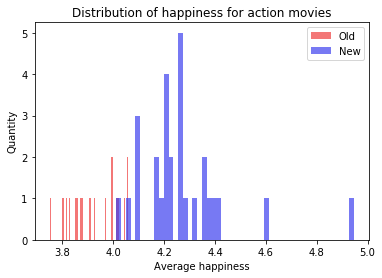

In [59]:
plt.hist(actionHappinessOld, bins=50, alpha=0.7, color="#EE3D3D", label="Old")
plt.hist(actionHappinessNew, bins=50, alpha=0.7, color="#3D40EE", label="New")
plt.title("Distribution of happiness for action movies")
plt.xlabel("Average happiness")
plt.ylabel("Quantity")
plt.legend()
plt.show()

In [61]:
actionHappinessNew

[4.269491423140943,
 4.270652535327032,
 4.193931986131115,
 4.1798129480341,
 4.164368380076481,
 4.225124223904296,
 4.204731557601744,
 4.275765433254621,
 4.204802013956778,
 4.055417391655884,
 4.26122427837088,
 4.199465837232028,
 4.1030690800284395,
 4.206831926377035,
 4.411633071231682,
 4.356452519197851,
 4.3822413104274975,
 4.223722320302702,
 4.096890604541981,
 4.256739627924531,
 4.392763986721835,
 4.352550562340142,
 4.093909056651164,
 4.263617021276601,
 4.32346455179044,
 4.012,
 4.947108433734942,
 4.600789473684212]

In [68]:
old_tokens

[["'s",
  'pop',
  'culture',
  'icons',
  'danny',
  'bonaduce',
  'barry',
  'williams',
  'face',
  'hunt',
  'legendary',
  'mountain',
  'creature',
  'sadistic',
  'tale',
  'lonely',
  'mentally',
  'handicapped',
  'boy',
  'befriends',
  'reflection',
  'antique',
  'mirror',
  'demonic',
  'creature',
  'orders',
  'go',
  'murderous',
  'rampage',
  'kill',
  'people',
  'loves',
  'young',
  'girl',
  'buys',
  'antique',
  'box',
  'yard',
  'sale',
  'unaware',
  'inside',
  'collectible',
  'lives',
  'malicious',
  'ancient',
  'spirit',
  'girl',
  "'s",
  'father',
  'teams',
  'ex-wife',
  'find',
  'way',
  'end',
  'curse',
  'upon',
  'child',
  'young',
  'woman',
  'suffers',
  'strange',
  'disease',
  'must',
  'travel',
  'mysterious',
  'island',
  'south',
  'america',
  'myths',
  'reality',
  'one',
  'fifty',
  'years',
  'incidents',
  'black',
  'claw',
  'mountain',
  'group',
  'students',
  'prey',
  'monster',
  'part',
  'human',
  'part',
  'bear

In [89]:
len(avg_happiness_map)

0

## References

[1] Maklin, C. (2019). "TF IDF | TFIDF Python Example" (WEB). Towards Data Science.; https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76

[2] Dodds, P. S.; Harris, K. D.; Kloumann, I. M.; Bliss, C. A.; Danforth, C. M. (2011). Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter; https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752

[3] Wikipedia, the free encyclopedia (2019), Lexical analysis; https://en.wikipedia.org/wiki/Lexical_analysis#Tokenization 